# Stock Market Analysis and Portfolio Prediction

**Gayathri Sakthirajan**

**Sufi Ali**

**Vibhuti Singh**

**Sudhir Choudary**

IIIT-B, PGP Data Science, January 2023

## Sections

## 1. Business Case

    1.1. Business Context
    1.2. Task
    1.3. Objectives
    1.4. Key Stakeholder
    1.5. Data
    1.6. Deliverables


## 2. Data Understanding and Preparation

    2.1. Import libraries   
    2.2. Download the dataset
    2.3. Explore the dataset for general information and missing values
    2.4. Change the format to date time format
    2.5. Create merged data frame comprising of all stocks with unique identifaction
        
## 3. Data Exploration
    
    3.1. Creating required dataframes
    3.2. Exploratory Data Analysis (EDA)
          3.2.1. Explore the distribution and check for outliers
          3.2.2. Correlation between prices and volumes among the stocks
          3.2.3. Price-Volume pattern of stocks over the period using line graphs
          3.2.4. Comparison of stock-price among the industry and with the index using normalized values
          3.2.5. Relative Strength Index of Stocks: Stock Price with respect to Index           
    
## 4. Stock Analysis to find the most suitable Stocks

    4.1. Evaluate the stocks using key metrics of CAPM
    4.2. Build Portfolio
        4.2.1. Selection of Stocks for the portfolio
        4.2.2. Find the overall value of the Portfolio

## 5. Stock Price Prediction and Predicting the Future Value of Portfolio
    5.1. Train -Test split
    5.2. Model Building, Fitting and Predicting future prices on the test-train dataset
    5.3. Find the future value of the chose stocks by the end of 4 years
    5.4. Find the future value of the chosen Portfolio by the end of 4 years
    5.5. Build another portfolio and repeat step 1 to 4 above

## 6. Final Recommendation

## 1. Business Case

**1.1. Business Context**

We have an investor named Alexandra with the following characteristics:
She is a conservative investor and wants to invest the money she saved in her school days received from her millionaire parent. She wants to set up an NGO to support people in Sub-Saharan Africa and expects that her investment should fetch adequate returns to fund this initiative. She doesn't want to get any support from outside for this project and wants to do it with her own funds. Hence, she expects a decent but steady flow of funds from her investments for a long time. 

**1.2.  Task:**

Analysing the performance of 12 stocks and creating a portfolio of stocks based on the client’s requirements.

**1.3 Objectives:**  

> - Identify trends in relevant dimensions- in this case the Close price and volume traded are considered
> - Determine how these trends can be applied for the creation of portfolio
> - Suggestive investment strategy for the client
> - Predict the future price of the stocks in the chosen portfolio

**1.4. Key Stakeholder: Ms. Alexandra Kolishnyick**

**1.5. Data**
    
1. The data is stored in 12 CSV files and this data is of 12 leading companies listed in New York Stock Exchange and 1 file of market benchmark S&P 500 index prices. 

2. The information for every stock has to be taken from 1st October 2010 to 30th September 2020.

3. The stocks belong to different domains:     - Aviation, Finance, Healthcare and Technology 

4. Data columns include 
> - Date
> - Open (Price of stock at the start of the day)
> - Close (Price of stock at the end of the day) 
> - High (Highest price reached by the stock on that day)
> - Low (Lowest price reached by the stock on that day)
> - Adjusted close(Stock price adjusted to include the annual returns (dividends) that the company offers to the shareholders) and - Volume (Number of stocks traded on the day)

5. Limitations of Data Set:There are 12 different files given in 4 different folders. We have to merge them in one file to do statistical analysis.

**1.6. Deliverables:**

> - A clean version of the final dataset.
> - A well commented Jupyter notebook containing the entire work.
> - A file containing a dashboard with all the important visualisations used in this project.
> - A PPT file with an executive summary containing your understanding of the investor, insights and recommended steps of action for the investors.
> - A video explaining the presentation: As the portfolio manager, you are expected to share a video presentation that you will share with the investors.

### 2. Data Understanding and Preparation

### 2.1. Import the libraries

In [1]:
# import packages and alias
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib as plt # data visualization
import matplotlib.pyplot as plt
import datetime as dt # date time

import statsmodels.api as sm
from statsmodels.tsa.api import VAR

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_theme()
pd.set_option('display.max_columns', None)
import math

### 2.2. Download the dataset

In [2]:
# Create dataframes from the csv files

AAL_df = pd.read_csv('AAL.csv')
ALK_df = pd.read_csv('ALK.csv')
HA_df = pd.read_csv('HA.csv')
CS_df = pd.read_csv('CS.csv')
DB_df = pd.read_csv('DB.csv')
GS_df = pd.read_csv('GS.csv')
BHC_df = pd.read_csv('BHC.csv')
JNJ_df = pd.read_csv('JNJ.csv')
MRK_df = pd.read_csv('MRK.csv')
AAPL_df = pd.read_csv('AAPL.csv')
AMZN_df = pd.read_csv('AMZN.csv')
GOOG_df = pd.read_csv('GOOG.csv')
SP500_df = pd.read_csv('S&P500.csv')

### 2.3. Explore the dataset for general information and missing values

In [3]:
# Check the null values in the dataset
print('No missing data -->AAL') if sum(AAL_df.isnull().sum()) == 0 else (AAL_df.isnull().sum())/len(AAL_df)
print('No missing data -->ALK') if sum(ALK_df.isnull().sum()) == 0 else (ALK_df.isnull().sum())/len(ALK_df)
print('No missing data -->HA') if sum(HA_df.isnull().sum()) == 0 else (HA_df.isnull().sum())/len(HA_df)
print('No missing data -->Cs') if sum(CS_df.isnull().sum()) == 0 else (CS_df.isnull().sum())/len(CS_df)
print('No missing data -->DB') if sum(DB_df.isnull().sum()) == 0 else (DB_df.isnull().sum())/len(DB_df)
print('No missing data -->GS') if sum(GS_df.isnull().sum()) == 0 else (GS_df.isnull().sum())/len(GS_df)
print('No missing data -->BHC') if sum(BHC_df.isnull().sum()) == 0 else (BHC_df.isnull().sum())/len(BHC_df)
print('No missing data -->JNJ') if sum(JNJ_df.isnull().sum()) == 0 else (JNJ_df.isnull().sum())/len(JNJ_df)
print('No missing data -->MRK') if sum(MRK_df.isnull().sum()) == 0 else (MRK_df.isnull().sum())/len(MRK_df)
print('No missing data -->AAPL') if sum(AAPL_df.isnull().sum()) == 0 else (AAPL_df.isnull().sum())/len(AAPL_df)
print('No missing data -->AMZN') if sum(AMZN_df.isnull().sum()) == 0 else (AMZN_df.isnull().sum())/len(AMZN_df)
print('No missing data -->GOOG') if sum(GOOG_df.isnull().sum()) == 0 else (GOOG_df.isnull().sum())/len(GOOG_df)
print('No missing data -->SP500') if sum(SP500_df.isnull().sum()) == 0 else (SP500_df.isnull().sum())/len(SP500_df)

No missing data -->AAL
No missing data -->AAPL
No missing data -->SP500


#### Observation: No missing data found in the dataset. No need for missing value treatment.

In [4]:
# Check the shape of all datasets
print('Shape of AAL: ',AAL_df.shape)
print('Shape of ALK: ',ALK_df.shape)
print('Shape of HA: ',HA_df.shape)
print('Shape of CS: ',CS_df.shape)
print('Shape of DB: ',DB_df.shape)
print('Shape of GS: ',GS_df.shape)
print('Shape of BHC: ',BHC_df.shape)
print('Shape of J&J: ',JNJ_df.shape)
print('Shape of MRK: ',MRK_df.shape)
print('Shape of AAPL: ',AAPL_df.shape)
print('Shape of AMZN: ',AMZN_df.shape)
print('Shape of GOOG: ',GOOG_df.shape)
print('Shape of S&P500: ',SP500_df.shape)

Shape of AAL:  (2517, 7)
Shape of ALK:  (2524, 7)
Shape of HA:  (2524, 7)
Shape of CS:  (2712, 7)
Shape of DB:  (2712, 7)
Shape of GS:  (2712, 7)
Shape of BHC:  (2525, 7)
Shape of J&J:  (2525, 7)
Shape of MRK:  (2525, 7)
Shape of AAPL:  (2517, 7)
Shape of AMZN:  (2524, 7)
Shape of GOOG:  (2524, 7)
Shape of S&P500:  (2517, 7)


#### Observation:
1. The datasets have different number of records
2. Also the stocks need to be analysed for the period of 1st October 2010 to 30th September 2020. Any records beyond this period needs to be dropped.

Hence, the primary key of the datasets need to be converted to datetime format

### 2.4. Convert the primary key of each file to date time format

In [5]:
AAL_df.Date=pd.to_datetime(AAL_df.Date,format='%d-%m-%Y')
ALK_df.Date=pd.to_datetime(ALK_df.Date,format='%d-%m-%Y')
HA_df.Date=pd.to_datetime(HA_df.Date,format='%d-%m-%Y')
CS_df.Date=pd.to_datetime(CS_df.Date,format='%d-%m-%Y')
DB_df.Date=pd.to_datetime(DB_df.Date,format='%d-%m-%Y')
GS_df.Date=pd.to_datetime(GS_df.Date,format='%d-%m-%Y')
BHC_df.Date=pd.to_datetime(BHC_df.Date,format='%d-%m-%Y')
JNJ_df.Date=pd.to_datetime(JNJ_df.Date,format='%d-%m-%Y')
MRK_df.Date=pd.to_datetime(MRK_df.Date,format='%d-%m-%Y')
AAPL_df.Date=pd.to_datetime(AAPL_df.Date,format='%d-%m-%Y')
AMZN_df.Date=pd.to_datetime(AMZN_df.Date,format='%d-%m-%Y')
GOOG_df.Date=pd.to_datetime(GOOG_df.Date,format='%d-%m-%Y')
SP500_df.Date=pd.to_datetime(SP500_df.Date,format='%d-%m-%Y')

In [6]:
# Extrating data ony from 1st October to 30th September
AAL_df= AAL_df[AAL_df.Date.between ('2010-10-01', '2020-09-30') ]
ALK_df= ALK_df[ALK_df.Date.between ('2010-10-01', '2020-09-30')]
HA_df= HA_df[HA_df.Date.between ('2010-10-01', '2020--09-30')]
CS_df= CS_df[CS_df.Date.between ('2010-10-01', '2020--09-30')]
DB_df= DB_df[DB_df.Date.between ('2010-10-01', '2020--09-30')]
GS_df= GS_df[GS_df.Date.between ('2010-10-01', '2020--09-30')]
BHC_df= BHC_df[BHC_df.Date.between ('2010-10-01', '2020--09-30')]
JNJ_df= JNJ_df[JNJ_df.Date.between ('2010-10-01', '2020--09-30')]
MRK_df= MRK_df[MRK_df.Date.between ('2010-10-01', '2020--09-30')]
AAPL_df= AAPL_df[AAPL_df.Date.between ('2010-10-01', '2020--09-30')]
AMZN_df= AMZN_df[AMZN_df.Date.between ('2010-10-01', '2020--09-30')]
GOOG_df= GOOG_df[GOOG_df.Date.between ('2010-10-01', '2020--09-30')]
SP500_df= SP500_df[SP500_df.Date.between ('2010-10-01', '2020--09-30')]

In [7]:
# Check the shape of all datasets after slicing
print('Shape of AAL: ',AAL_df.shape)
print('Shape of ALK: ',ALK_df.shape)
print('Shape of HA: ',HA_df.shape)
print('Shape of CS: ',CS_df.shape)
print('Shape of DB: ',DB_df.shape)
print('Shape of GS: ',GS_df.shape)
print('Shape of BHC: ',BHC_df.shape)
print('Shape of J&J: ',JNJ_df.shape)
print('Shape of MRK: ',MRK_df.shape)
print('Shape of AAPL: ',AAPL_df.shape)
print('Shape of AMZN: ',AMZN_df.shape)
print('Shape of GOOG: ',GOOG_df.shape)
print('Shape of S&P500: ',SP500_df.shape)

Shape of AAL:  (2517, 7)
Shape of ALK:  (2517, 7)
Shape of HA:  (2517, 7)
Shape of CS:  (2517, 7)
Shape of DB:  (2517, 7)
Shape of GS:  (2517, 7)
Shape of BHC:  (2517, 7)
Shape of J&J:  (2517, 7)
Shape of MRK:  (2517, 7)
Shape of AAPL:  (2517, 7)
Shape of AMZN:  (2517, 7)
Shape of GOOG:  (2517, 7)
Shape of S&P500:  (2517, 7)


### 2.5. Create merged data frame for all stocks

1. For further analysis all the stocks need to be merged into one data frame using date as primary key. -->
2. Each record should show the company name and industry in the merged data set. --> -->

In [8]:
#For showing all outputs in one cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
# Set Date as index

AAL_df=AAL_df.set_index('Date')
ALK_df=ALK_df.set_index('Date')
HA_df=HA_df.set_index('Date')
CS_df=CS_df.set_index('Date')
DB_df=DB_df.set_index('Date')
GS_df=GS_df.set_index('Date')
BHC_df=BHC_df.set_index('Date')
JNJ_df=JNJ_df.set_index('Date')
MRK_df=MRK_df.set_index('Date')
AAPL_df=AAPL_df.set_index('Date')
AMZN_df=AMZN_df.set_index('Date')
GOOG_df=GOOG_df.set_index('Date')
SP500_df=SP500_df.set_index('Date')

In [10]:
# Add Company name and industry for easy identification
AAL_df['Company']='American'
ALK_df['Company']='Alaska'
HA_df['Company']='Hawa'
CS_df['Company']='CS'
DB_df['Company']='Deutsche'
GS_df['Company']='Goldman'
JNJ_df['Company']='J&J'
MRK_df['Company']='Merck'
BHC_df['Company']='Bausch'
AAPL_df['Company']='Apple'
AMZN_df['Company']='Amazon'
GOOG_df['Company']='Google'
SP500_df['Company']='SP500'

AAL_df['Industry']='Aviation'
ALK_df['Industry']='Aviation'
HA_df['Industry']='Aviation'
CS_df['Industry']='Finance'
DB_df['Industry']='Finance'
GS_df['Industry']='Finance'
JNJ_df['Industry']='Healthcare'
MRK_df['Industry']='Healthcare'
BHC_df['Industry']='Healthcare'
AAPL_df['Industry']='Technology'
AMZN_df['Industry']='Technology'
GOOG_df['Industry']='Technology'
SP500_df['Industry']= 'Index'

In [11]:
# Test a sample dataframe after the changes
AAPL_df.head()

,Open,High,Low,Close,Adj Close,Volume,Company,Industry
Date,,,,,,,,
2010-10-01,10.219643,10.235000,10.048214,10.090000,8.719163,448142800,Apple,Technology
2010-10-04,10.057143,10.103572,9.920357,9.951428,8.599421,435302000,Apple,Technology
2010-10-05,10.071428,10.337500,10.065000,10.319285,8.917298,501967200,Apple,Technology
2010-10-06,10.342500,10.428214,10.187857,10.328215,8.925013,670868800,Apple,Technology
2010-10-07,10.369286,10.374286,10.246786,10.329286,8.925941,408399600,Apple,Technology


In [12]:
# Create merged dataframe
frames = [AAL_df,ALK_df,HA_df,CS_df,DB_df,GS_df,JNJ_df,MRK_df,BHC_df,AAPL_df,AMZN_df,GOOG_df,SP500_df]
merged_df=pd.concat(frames)

In [13]:
merged_df.shape

(32721, 8)

In [14]:
len(AAPL_df)*13

32721

#### Observation:
All the records of all the stocks are brought in the merged dataframe

In [15]:
# Check the dataframe
merged_df.head()

,Open,High,Low,Close,Adj Close,Volume,Company,Industry
Date,,,,,,,,
2010-10-01,9.29,9.39,9.21,9.29,8.758067,3603800.0,American,Aviation
2010-10-04,9.24,9.48,9.05,9.12,8.597802,3856800.0,American,Aviation
2010-10-05,9.27,9.35,9.15,9.23,8.701504,3896600.0,American,Aviation
2010-10-06,9.27,9.40,9.15,9.23,8.701504,3230200.0,American,Aviation
2010-10-07,9.30,9.31,9.07,9.24,8.710930,3877700.0,American,Aviation


In [16]:
# creating new Column with combine Company and Industry
merged_df['Name']=merged_df['Industry']+"-"+merged_df['Company']

In [17]:
# Check the dataframe
merged_df.head()

,Open,High,Low,Close,Adj Close,Volume,Company,Industry,Name
Date,,,,,,,,,
2010-10-01,9.29,9.39,9.21,9.29,8.758067,3603800.0,American,Aviation,Aviation-American
2010-10-04,9.24,9.48,9.05,9.12,8.597802,3856800.0,American,Aviation,Aviation-American
2010-10-05,9.27,9.35,9.15,9.23,8.701504,3896600.0,American,Aviation,Aviation-American
2010-10-06,9.27,9.40,9.15,9.23,8.701504,3230200.0,American,Aviation,Aviation-American
2010-10-07,9.30,9.31,9.07,9.24,8.710930,3877700.0,American,Aviation,Aviation-American


In [18]:
# Keep only necessary columns in the merged dataframe
# For the Prices, we will consider only Close prices of the stock
merged_df = merged_df[['Close','Volume','Name']]

In [19]:
merged_df.head()

,Close,Volume,Name
Date,,,
2010-10-01,9.29,3603800.0,Aviation-American
2010-10-04,9.12,3856800.0,Aviation-American
2010-10-05,9.23,3896600.0,Aviation-American
2010-10-06,9.23,3230200.0,Aviation-American
2010-10-07,9.24,3877700.0,Aviation-American


In [20]:
# Export the merged dataframe into a CSV file
merged_df.to_csv('./All Stocks.csv')

### 3 Data Exploration

###     3.1. Create dataframes for Price and Volume


In [21]:
# Create a dataframe of price for each Segment
prices=merged_df.pivot_table(index='Date',values='Close',columns='Name').reset_index('Date')

In [22]:
# Create a dataframe for price from the merged dataframe
prices = pd.pivot_table(merged_df,index="Date",columns="Name", values='Close') \
       .reset_index().rename_axis(None, axis=1)
prices.head()

,Date,Aviation-Alaska,Aviation-American,Aviation-Hawa,Finance-CS,Finance-Deutsche,Finance-Goldman,Healthcare-Bausch,Healthcare-J&J,Healthcare-Merck,Index-SP500,Technology-Amazon,Technology-Apple,Technology-Google
0,2010-10-01,12.4475,9.29,5.96,42.226563,52.595421,147.699997,25.750000,61.750000,36.599998,1146.239990,153.710007,10.090000,261.828613
1,2010-10-04,12.1425,9.12,5.75,41.914063,51.755726,146.570007,25.870001,61.669998,36.520000,1137.030029,155.389999,9.951428,260.199707
2,2010-10-05,12.2150,9.23,5.85,43.154297,53.950382,149.570007,26.299999,62.799999,37.020000,1160.750000,160.869995,10.319285,268.110046
3,2010-10-06,12.1875,9.23,5.97,43.437500,54.608780,150.839996,26.690001,63.209999,37.009998,1159.969971,155.399994,10.328215,266.177307
4,2010-10-07,11.6250,9.24,6.15,43.671875,54.036259,151.110001,26.600000,63.220001,36.709999,1158.060059,156.270004,10.329286,264.015411


In [23]:
# set date as index
prices=prices.set_index('Date')

In [24]:
prices.head()

,Aviation-Alaska,Aviation-American,Aviation-Hawa,Finance-CS,Finance-Deutsche,Finance-Goldman,Healthcare-Bausch,Healthcare-J&J,Healthcare-Merck,Index-SP500,Technology-Amazon,Technology-Apple,Technology-Google
Date,,,,,,,,,,,,,
2010-10-01,12.4475,9.29,5.96,42.226563,52.595421,147.699997,25.750000,61.750000,36.599998,1146.239990,153.710007,10.090000,261.828613
2010-10-04,12.1425,9.12,5.75,41.914063,51.755726,146.570007,25.870001,61.669998,36.520000,1137.030029,155.389999,9.951428,260.199707
2010-10-05,12.2150,9.23,5.85,43.154297,53.950382,149.570007,26.299999,62.799999,37.020000,1160.750000,160.869995,10.319285,268.110046
2010-10-06,12.1875,9.23,5.97,43.437500,54.608780,150.839996,26.690001,63.209999,37.009998,1159.969971,155.399994,10.328215,266.177307
2010-10-07,11.6250,9.24,6.15,43.671875,54.036259,151.110001,26.600000,63.220001,36.709999,1158.060059,156.270004,10.329286,264.015411


In [25]:
prices.shape

(2517, 13)

In [26]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2010-10-01 to 2020-09-30
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aviation-Alaska    2517 non-null   float64
 1   Aviation-American  2517 non-null   float64
 2   Aviation-Hawa      2517 non-null   float64
 3   Finance-CS         2517 non-null   float64
 4   Finance-Deutsche   2517 non-null   float64
 5   Finance-Goldman    2517 non-null   float64
 6   Healthcare-Bausch  2517 non-null   float64
 7   Healthcare-J&J     2517 non-null   float64
 8   Healthcare-Merck   2517 non-null   float64
 9   Index-SP500        2517 non-null   float64
 10  Technology-Amazon  2517 non-null   float64
 11  Technology-Apple   2517 non-null   float64
 12  Technology-Google  2517 non-null   float64
dtypes: float64(13)
memory usage: 275.3 KB


### Observation: 
There are no null values noticed in the 'Closing Price' information of any of the given stock and hence there is no need for missing value treatment

In [27]:
# Create a dataframe of Volume of stock for each Segment
volume = pd.pivot_table(merged_df,index="Date",columns="Name", values='Volume') \
       .reset_index().rename_axis(None, axis=1)
volume.head()

,Date,Aviation-Alaska,Aviation-American,Aviation-Hawa,Finance-CS,Finance-Deutsche,Finance-Goldman,Healthcare-Bausch,Healthcare-J&J,Healthcare-Merck,Index-SP500,Technology-Amazon,Technology-Apple,Technology-Google
0,2010-10-01,1663600.0,3603800.0,645400.0,1814900.0,2010600.0,7439800.0,5778700.0,9773200.0,11741900.0,4.298910e+09,8683400.0,448142800.0,4466600.0
1,2010-10-04,1512400.0,3856800.0,618900.0,1085600.0,1245600.0,5866700.0,4187200.0,8703600.0,9234900.0,3.604110e+09,5346500.0,435302000.0,3895400.0
2,2010-10-05,2567200.0,3896600.0,534800.0,1025300.0,2270900.0,8724700.0,4610300.0,12439400.0,10669200.0,4.068840e+09,5620000.0,501967200.0,7040400.0
3,2010-10-06,1043600.0,3230200.0,2563900.0,871300.0,1887400.0,6330600.0,4448900.0,11339800.0,7541300.0,4.073160e+09,6060800.0,670868800.0,5545200.0
4,2010-10-07,7682400.0,3877700.0,1115200.0,1377000.0,1191000.0,4471500.0,2453900.0,9826600.0,13897800.0,3.910550e+09,4622000.0,408399600.0,4809400.0


In [28]:
# Check the dataframe
volume.head()

,Date,Aviation-Alaska,Aviation-American,Aviation-Hawa,Finance-CS,Finance-Deutsche,Finance-Goldman,Healthcare-Bausch,Healthcare-J&J,Healthcare-Merck,Index-SP500,Technology-Amazon,Technology-Apple,Technology-Google
0,2010-10-01,1663600.0,3603800.0,645400.0,1814900.0,2010600.0,7439800.0,5778700.0,9773200.0,11741900.0,4.298910e+09,8683400.0,448142800.0,4466600.0
1,2010-10-04,1512400.0,3856800.0,618900.0,1085600.0,1245600.0,5866700.0,4187200.0,8703600.0,9234900.0,3.604110e+09,5346500.0,435302000.0,3895400.0
2,2010-10-05,2567200.0,3896600.0,534800.0,1025300.0,2270900.0,8724700.0,4610300.0,12439400.0,10669200.0,4.068840e+09,5620000.0,501967200.0,7040400.0
3,2010-10-06,1043600.0,3230200.0,2563900.0,871300.0,1887400.0,6330600.0,4448900.0,11339800.0,7541300.0,4.073160e+09,6060800.0,670868800.0,5545200.0
4,2010-10-07,7682400.0,3877700.0,1115200.0,1377000.0,1191000.0,4471500.0,2453900.0,9826600.0,13897800.0,3.910550e+09,4622000.0,408399600.0,4809400.0


In [29]:
# prices = prices.drop('Segment', axis=1, inplace=True)
volume=volume.set_index('Date')

In [30]:
# Explore the shape of Volume dataframe
volume.shape

(2517, 13)

In [31]:
# Check for missing values
volume.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2010-10-01 to 2020-09-30
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aviation-Alaska    2517 non-null   float64
 1   Aviation-American  2517 non-null   float64
 2   Aviation-Hawa      2517 non-null   float64
 3   Finance-CS         2517 non-null   float64
 4   Finance-Deutsche   2517 non-null   float64
 5   Finance-Goldman    2517 non-null   float64
 6   Healthcare-Bausch  2517 non-null   float64
 7   Healthcare-J&J     2517 non-null   float64
 8   Healthcare-Merck   2517 non-null   float64
 9   Index-SP500        2517 non-null   float64
 10  Technology-Amazon  2517 non-null   float64
 11  Technology-Apple   2517 non-null   float64
 12  Technology-Google  2517 non-null   float64
dtypes: float64(13)
memory usage: 275.3 KB


### Observation: 
There are no null values noticed in the 'Volume' information of any of the given stock and hence there is no need for missing value treatment

As the data preparation is complete, now the dataset is ready for further exploration and analysis

### 3.2. Exploratory Data Analysis (EDA)

Steps include

1. Explore the distribution and check for outliers
- Boxplot to see the distribution patter of price
- Histogram to inspect varioation in stock volume to understand volatility
2. Correlation between prices and volumes among the stocks
3. Price-Volume pattern of stocks over the period using line graphs
4. Comparison of stock-price among the industry and with the index using normalized values

### 3.2.1. Explore distribution and check for outliers

In [32]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
prices.describe(percentiles=[.25, .5, .75, .90, .95, .99]).round(2)

,Aviation-Alaska,Aviation-American,Aviation-Hawa,Finance-CS,Finance-Deutsche,Finance-Goldman,Healthcare-Bausch,Healthcare-J&J,Healthcare-Merck,Index-SP500,Technology-Amazon,Technology-Apple,Technology-Google
count,2517.00,2517.00,2517.00,2517.00,2517.00,2517.00,2517.00,2517.00,2517.00,2517.00,2517.00,2517.00,2517.00
mean,50.03,29.40,22.87,21.50,27.30,179.60,61.88,105.28,57.16,2111.39,854.64,33.45,730.43
std,24.19,15.21,15.48,8.99,15.41,42.41,57.17,28.17,15.16,612.23,745.20,20.63,364.69
min,11.62,4.00,3.78,6.67,5.48,87.70,8.51,57.66,29.81,1099.23,153.03,9.95,236.55
25%,26.78,13.01,7.03,13.74,13.47,154.99,22.17,81.93,45.73,1562.17,266.49,18.96,403.64
50%,58.54,32.52,21.91,19.64,28.37,177.23,38.76,104.04,57.18,2071.22,533.75,27.59,651.79
75%,67.26,42.20,36.90,27.75,41.05,211.58,90.27,130.98,64.09,2656.30,1500.00,42.96,1055.81
90%,79.97,48.52,45.74,31.69,47.34,237.09,139.43,140.77,81.37,2932.95,1883.97,56.76,1229.46
95%,87.25,51.20,49.17,40.62,54.69,245.80,202.71,146.26,84.34,3128.57,2137.87,77.38,1393.51
99%,95.12,54.31,56.23,44.06,59.19,262.87,239.43,150.51,89.09,3373.17,3162.04,112.98,1521.84


In [33]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [34]:
list(prices.columns)

['Aviation-Alaska',
 'Aviation-American',
 'Aviation-Hawa',
 'Finance-CS',
 'Finance-Deutsche',
 'Finance-Goldman',
 'Healthcare-Bausch',
 'Healthcare-J&J',
 'Healthcare-Merck',
 'Index-SP500',
 'Technology-Amazon',
 'Technology-Apple',
 'Technology-Google']

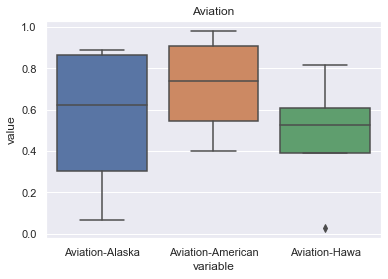

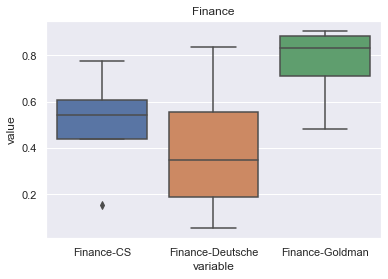

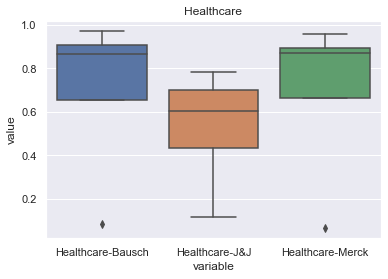

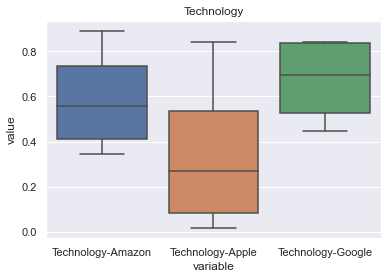

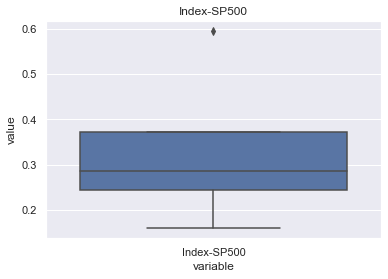

In [35]:
prices_AV = pd.DataFrame(data = np.random.random(size=(4,3)), columns = ['Aviation-Alaska','Aviation-American','Aviation-Hawa'])
sns.boxplot(x="variable", y="value", data=pd.melt(prices_AV))
plt.title("Aviation")
plt.show()

prices_Fin = pd.DataFrame(data = np.random.random(size=(4,3)), columns = ['Finance-CS','Finance-Deutsche','Finance-Goldman'])
sns.boxplot(x="variable", y="value", data=pd.melt(prices_Fin))
plt.title("Finance")
plt.show()

prices_health = pd.DataFrame(data = np.random.random(size=(4,3)), columns = ['Healthcare-Bausch','Healthcare-J&J','Healthcare-Merck'])
sns.boxplot(x="variable", y="value", data=pd.melt(prices_health))
plt.title("Healthcare")
plt.show()

prices_Tech = pd.DataFrame(data = np.random.random(size=(4,3)), columns = ['Technology-Amazon','Technology-Apple','Technology-Google'])
sns.boxplot(x="variable", y="value", data=pd.melt(prices_Tech))
plt.title("Technology")
plt.show()

prices_SP500 = pd.DataFrame(data = np.random.random(size=(4,1)), columns = ['Index-SP500'])
sns.boxplot(x="variable", y="value", data=pd.melt(prices_SP500))
plt.title("Index-SP500")
plt.show()

### Observation: 
1. **Aviation:** Alaska and Hawaiian are normally distributed while American airlines the most of the frequencies lie below the median inplies the mean is lesser than the median.
2. **Finance:** Credit Suisse and Deutsche are normally distributed while Goldman shows a very slight skewness towards the left.
3. **Healthcare:** Bausch and J&J are almost normally distributed  but Merck shows higher distribution lower than median
4. **Technology:** Google – normal distribution; Apple and Amazon are left skewed; Apple shows outliers in the first quartile. 
5. **SP500:** Index prices are distributed in such a way that the median is higher than mean with implying more extreme prices in the bottom 50% of the distribution

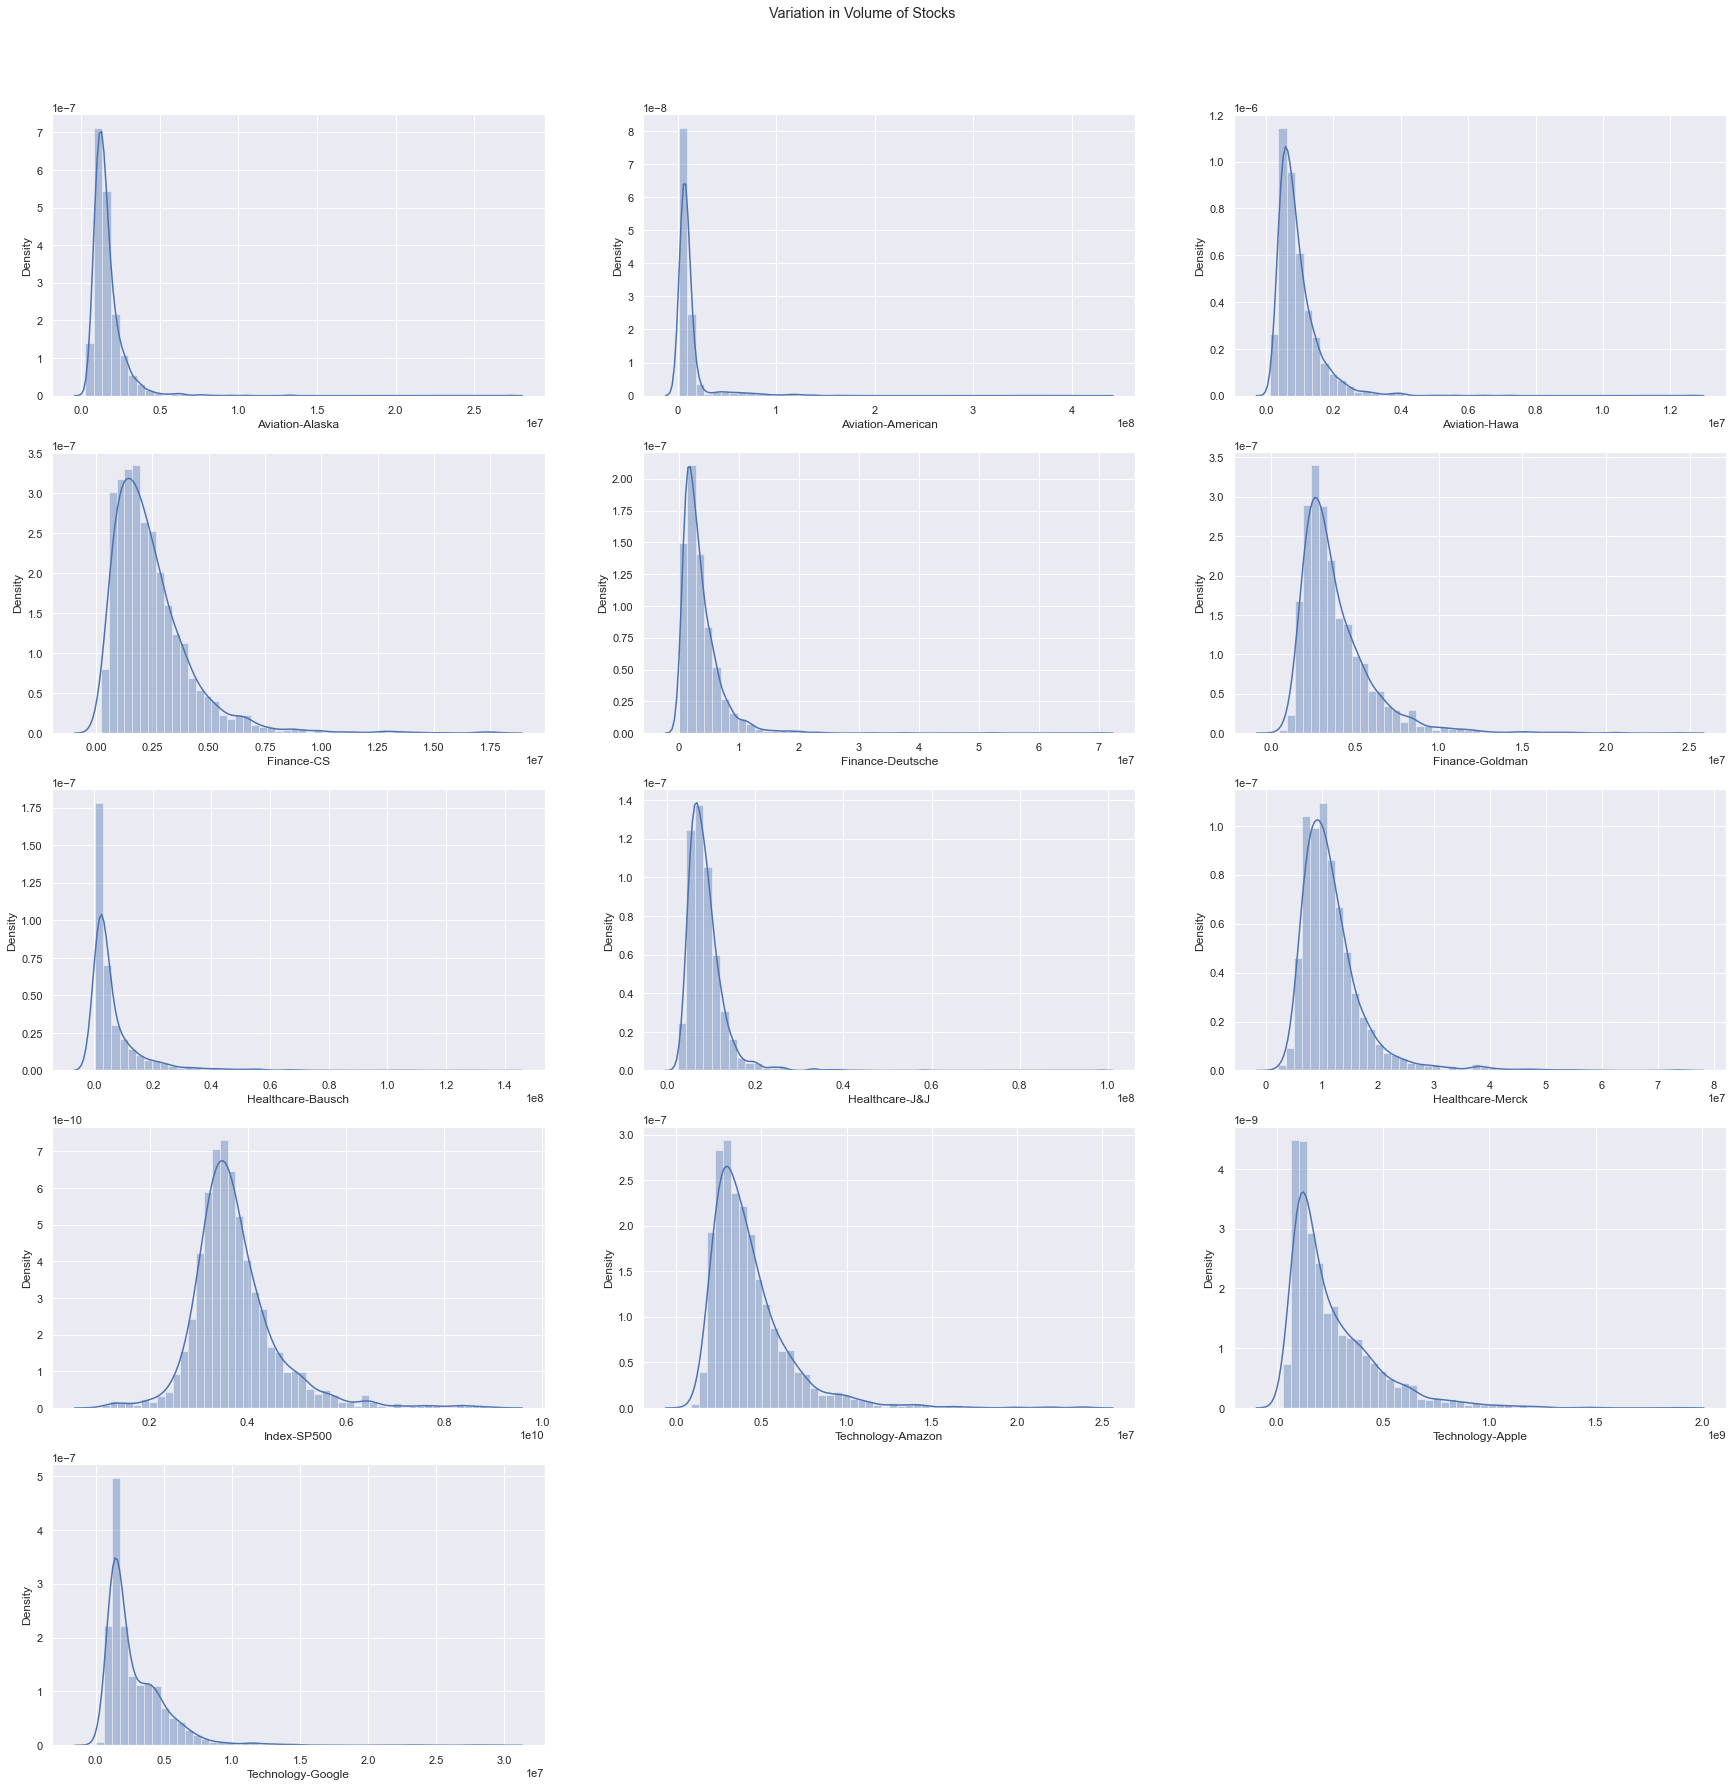

In [36]:
#Plotting the histogram plots of the Volumes of Stocks
plt.figure(figsize = (30,30))
plt.tight_layout()
feature = volume.columns
for i in enumerate(feature):
    plt.subplot(5,3, i[0]+1)
    sns.distplot(volume[i[1]],hist=True)
    
plt.suptitle("Variation in Volume of Stocks",y=0.93)
plt.show()

### Observation:
The above plot gives the ditribution of Volume around the mean. Higher the standard deviation, more volatile is the stock. Stocks with higher Standard deviation will cover more area in the above graph.Hence, volatility can be seen in CS_Fin, GS-Fin, Merck-HC, AAPL, AMZN and GOOG.

### 3.2.2.Find the Correlation of volume and price of stocks
This is done to see which stocks are highly correlated with the index in terms of price and volume traded

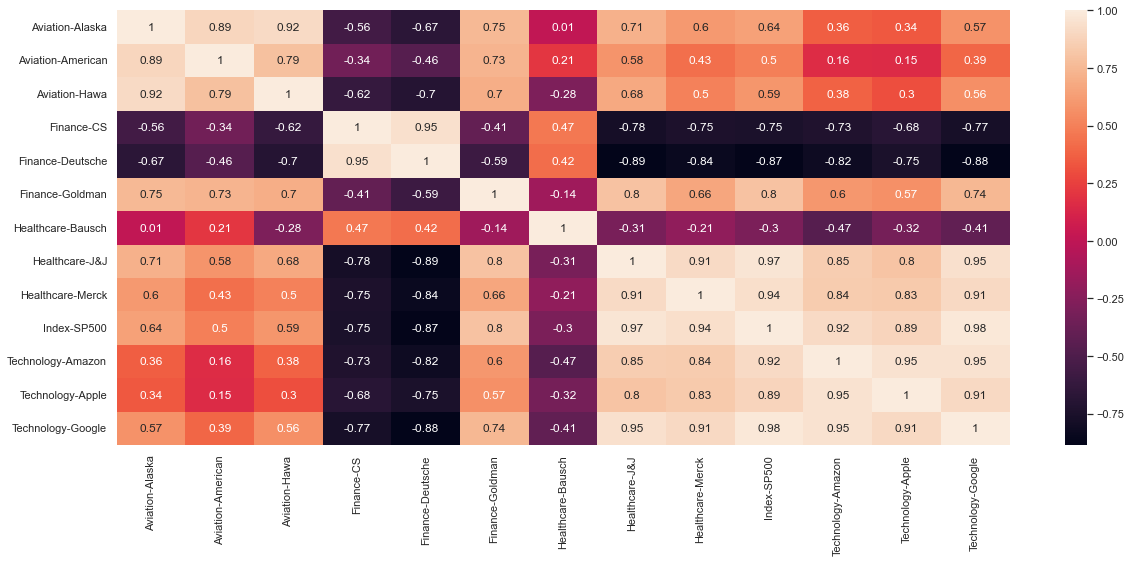

In [37]:
#Plotting the correlation of Stock Prices
plt.figure(figsize = (20,8))
sns.heatmap(prices.corr(),annot = True)
plt.show()

### Observation:
Upon inspecting the correlation of each stock with the index, it is found that:

1. Stocks with Strong Positive Correlation (0.6 to 1): Apple, Amazon, Google, Goldman Sachs, J&J, Merck & Co & Alaska

2. Stocks with Weak Positive Correlation (0 to 0.6): American Airlines, Hawaiian Holdings.

3. Stocks with Negative Correlation (0 to -1): Bausch Health, Credit Suisse, Deutsche Bank.

Ideally, the stocks that have negative correlation with the Index (S&P 500) should be avoided in the portfolio since they may prove to be very risky.

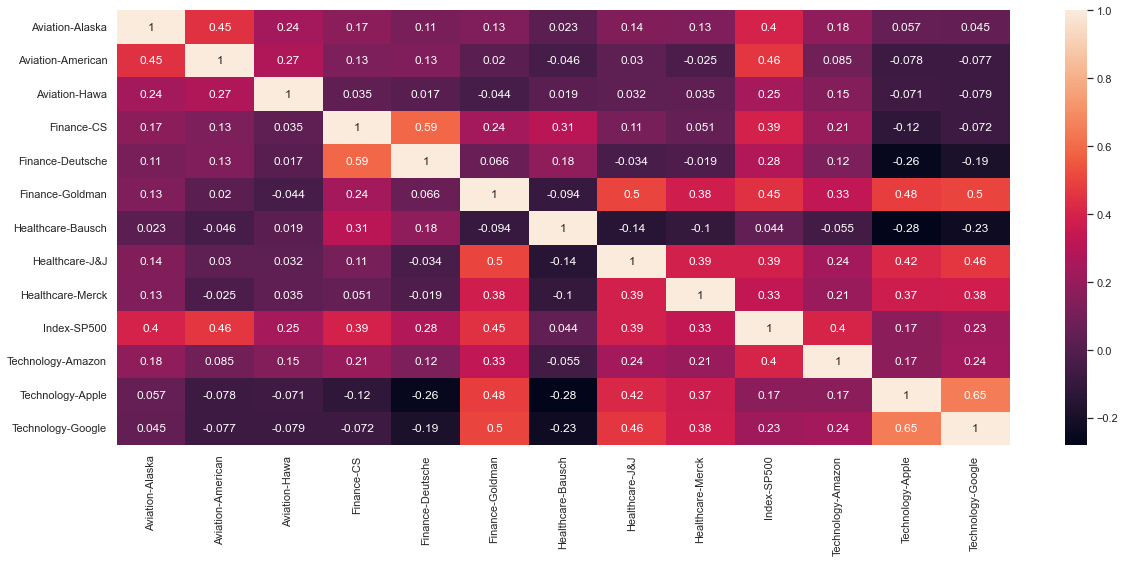

In [38]:
#Plotting the correlation of Stock Volume
plt.figure(figsize = (20,8))
sns.heatmap(volume.corr(),annot = True)
plt.show()

### Obervation :
All the stocks have a positve correlation with S&P500.
However, the correlation is of a weak positive correlation with the highest being 0.46 with American Air

### 3.2.3. Price-Volume pattern of stocks over the period using line graphs

To inspect if the movement of stock prices and volume are in sink with the index

#### Explore the movement in Volume of stocks traded

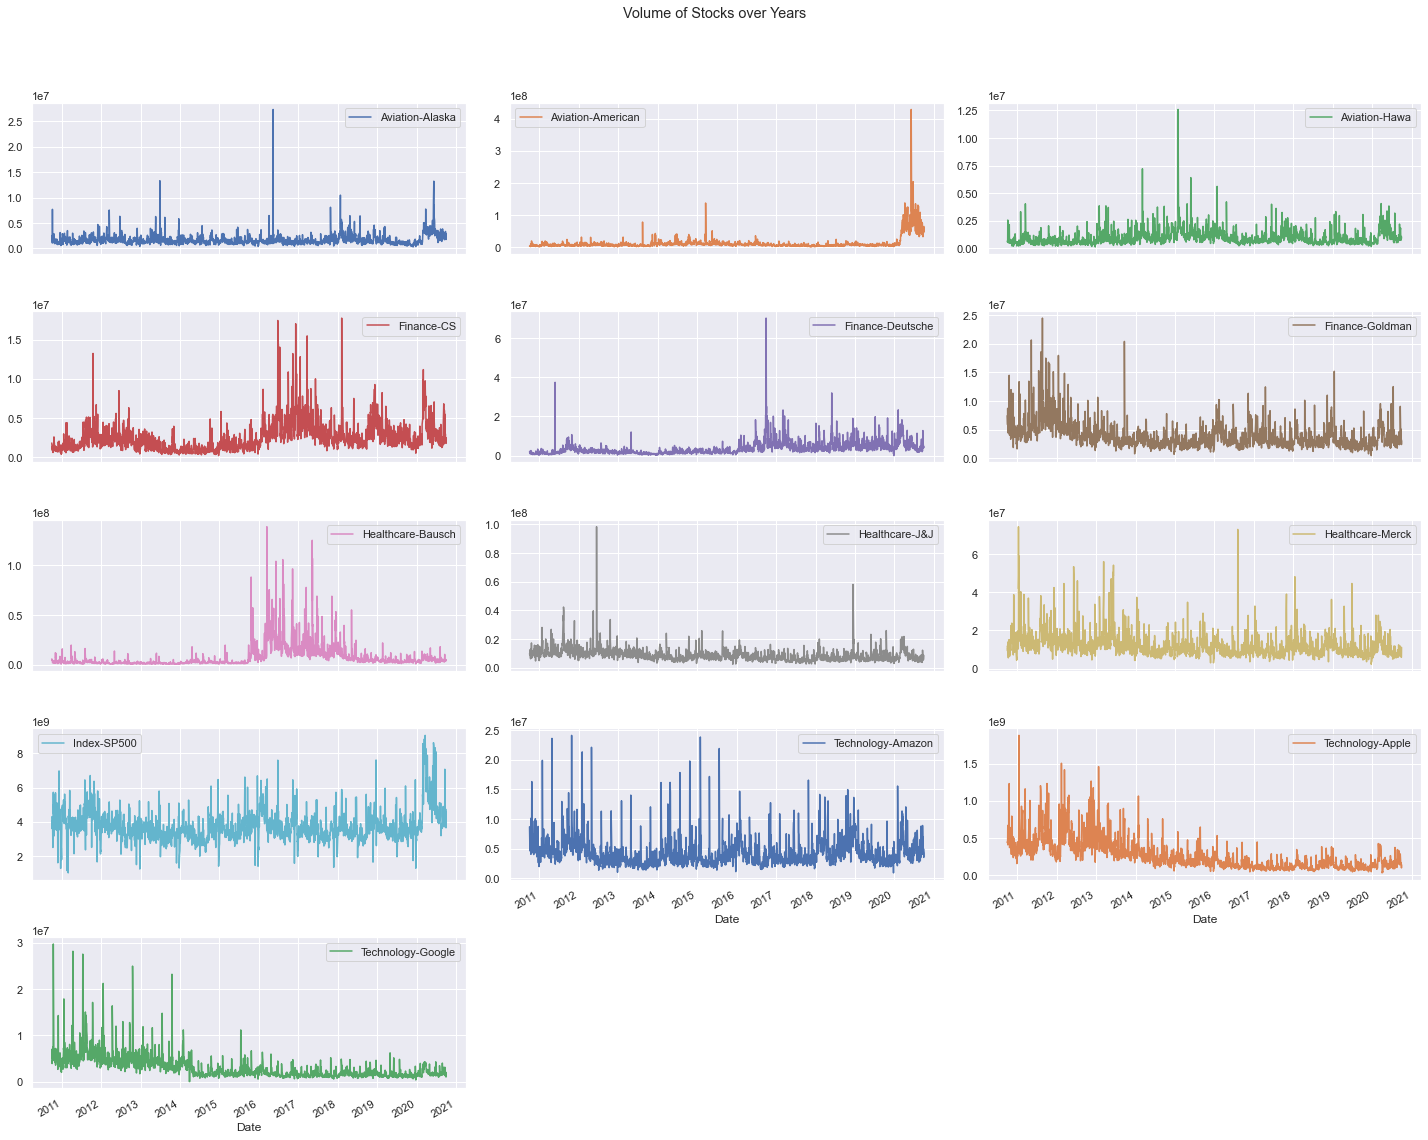

In [39]:
#Creating Sub-plots to visualize the stocks volume
volume.plot(kind = 'line',subplots=True, layout = (7,3),figsize=(20,20))
plt.tight_layout()
plt.suptitle("Volume of Stocks over Years",y=1.05)
plt.show()

### Observation:
The volumes have gone up in 2020-21 for all the stocks in Aviation industry
In the Tech sector- Apple and Google stock volumes are more or less stabilized although the volumes traded were higher during 2011-2014; However, Amazon stocks are fluctuating in volumes. 

#### Explore the movement in actual prices of stocks over a period of time

In [40]:
prices.head(1)

,Aviation-Alaska,Aviation-American,Aviation-Hawa,Finance-CS,Finance-Deutsche,Finance-Goldman,Healthcare-Bausch,Healthcare-J&J,Healthcare-Merck,Index-SP500,Technology-Amazon,Technology-Apple,Technology-Google
Date,,,,,,,,,,,,,
2010-10-01,12.4475,9.29,5.96,42.226563,52.595421,147.699997,25.75,61.75,36.599998,1146.23999,153.710007,10.09,261.828613


#### Creating Sub-plots to visualize the stocks movement

As the prices are not normalised, its good to view them sectorwise


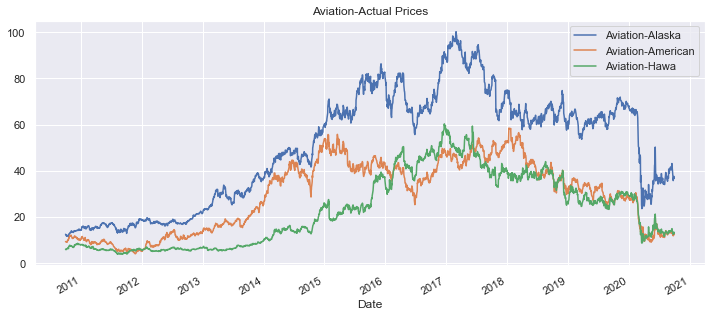

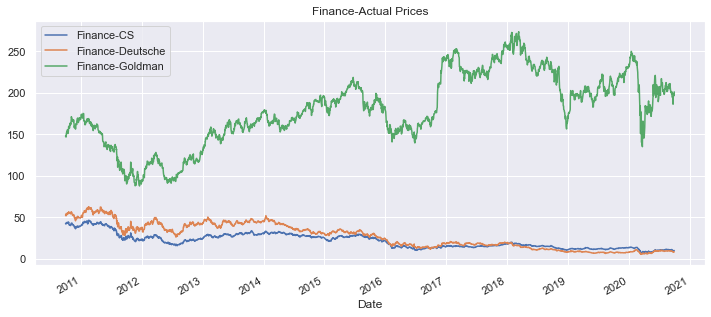

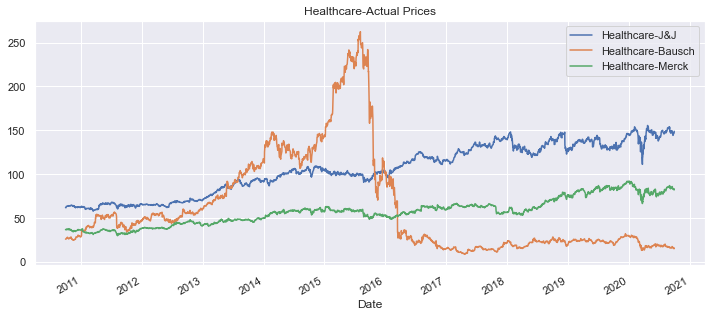

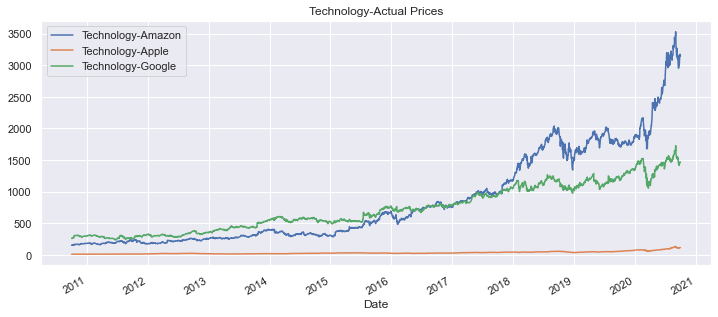

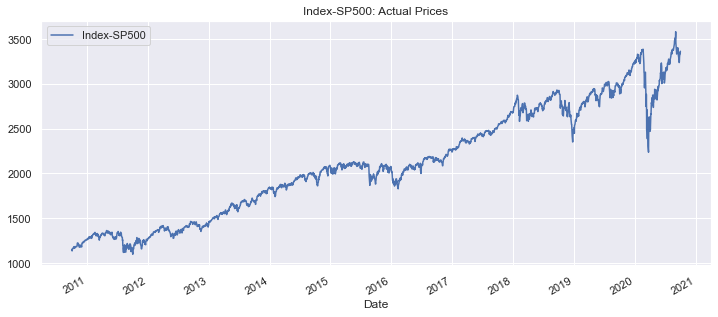

In [41]:
# Plot the actual prices of stocks- industrywise

# Plot the stocks of Aviation
prices[['Aviation-Alaska', 'Aviation-American', 'Aviation-Hawa']].plot(subplots=False, title = 'Aviation-Actual Prices', figsize=(12,5))

# Plot the stocks of Finance
prices[['Finance-CS', 'Finance-Deutsche', 'Finance-Goldman']].plot(subplots=False, title="Finance-Actual Prices", figsize=(12,5))

# Plot the stocks of Healthcare
prices[['Healthcare-J&J', 'Healthcare-Bausch', 'Healthcare-Merck']].plot(subplots=False, title="Healthcare-Actual Prices", figsize=(12,5))

# Plot the stocks of Technology
prices[['Technology-Amazon', 'Technology-Apple', 'Technology-Google']].plot(subplots=False, title="Technology-Actual Prices", figsize=(12,5))

# Plot the stocks of Index
prices[['Index-SP500']].plot(subplots=False, title="Index-SP500: Actual Prices", figsize=(12,5))

plt.show()

### Observation:

1. Tech industry's stocks show an uptrend especially Amazon and Google.  
2. In the Healcare, J&J and Merck show a slight uptrend while Bausch faces a downfall
3. Both Finance and Aviation indusry stocks are in downtrend. 
4. There is a significant difference in the prices levels of stocks within the sector itself.
5. The market index shows a clear uptrend despite a couple of sharp falls in some years.

### 3.2.4. Comparison of price of stocks among the industry and with the index using normalized values
The stock prices of various stocks here are on different scales. Hence, we need to perform normalisation to have them on the same scale for analysis. MinMax scaler is used for normalization.

In [42]:
# Create a copy of Price dataframe for normalization
prices_normal=prices.copy()

# Checking the data
prices_normal.head()

,Aviation-Alaska,Aviation-American,Aviation-Hawa,Finance-CS,Finance-Deutsche,Finance-Goldman,Healthcare-Bausch,Healthcare-J&J,Healthcare-Merck,Index-SP500,Technology-Amazon,Technology-Apple,Technology-Google
Date,,,,,,,,,,,,,
2010-10-01,12.4475,9.29,5.96,42.226563,52.595421,147.699997,25.750000,61.750000,36.599998,1146.239990,153.710007,10.090000,261.828613
2010-10-04,12.1425,9.12,5.75,41.914063,51.755726,146.570007,25.870001,61.669998,36.520000,1137.030029,155.389999,9.951428,260.199707
2010-10-05,12.2150,9.23,5.85,43.154297,53.950382,149.570007,26.299999,62.799999,37.020000,1160.750000,160.869995,10.319285,268.110046
2010-10-06,12.1875,9.23,5.97,43.437500,54.608780,150.839996,26.690001,63.209999,37.009998,1159.969971,155.399994,10.328215,266.177307
2010-10-07,11.6250,9.24,6.15,43.671875,54.036259,151.110001,26.600000,63.220001,36.709999,1158.060059,156.270004,10.329286,264.015411


In [43]:
# Importing MinMax Scaler

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [44]:
# Normalizing the Data using MinMax Scaler
scaler = MinMaxScaler()
scaler.fit(prices_normal)
price_normalized = pd.DataFrame(scaler.transform(prices_normal), index=prices_normal.index, columns = prices_normal.columns)
price_normalized.head()
# X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

,Aviation-Alaska,Aviation-American,Aviation-Hawa,Finance-CS,Finance-Deutsche,Finance-Goldman,Healthcare-Bausch,Healthcare-J&J,Healthcare-Merck,Index-SP500,Technology-Amazon,Technology-Apple,Technology-Google
Date,,,,,,,,,,,,,
2010-10-01,0.009338,0.097118,0.038570,0.892402,0.824503,0.323137,0.067871,0.041799,0.109111,0.018943,0.000201,0.001115,0.016944
2010-10-04,0.005896,0.093997,0.034855,0.884559,0.809808,0.317051,0.068344,0.040981,0.107826,0.015232,0.000699,0.000000,0.015852
2010-10-05,0.006714,0.096016,0.036624,0.915686,0.848214,0.333208,0.070037,0.052529,0.115861,0.024790,0.002321,0.002961,0.021154
2010-10-06,0.006404,0.096016,0.038747,0.922794,0.859736,0.340047,0.071572,0.056719,0.115700,0.024476,0.000702,0.003033,0.019859
2010-10-07,0.000056,0.096200,0.041932,0.928676,0.849717,0.341502,0.071218,0.056822,0.110879,0.023706,0.000959,0.003042,0.018410


In [45]:
price_normalized.describe()

,Aviation-Alaska,Aviation-American,Aviation-Hawa,Finance-CS,Finance-Deutsche,Finance-Goldman,Healthcare-Bausch,Healthcare-J&J,Healthcare-Merck,Index-SP500,Technology-Amazon,Technology-Apple,Technology-Google
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,0.433437,0.466268,0.337764,0.372239,0.381928,0.494928,0.210113,0.486636,0.439516,0.407865,0.207673,0.189194,0.331075
std,0.272930,0.279271,0.273939,0.225583,0.269669,0.228379,0.225070,0.287933,0.243685,0.246706,0.220577,0.166066,0.244472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.171067,0.165412,0.057502,0.177443,0.139822,0.362398,0.053777,0.248033,0.255825,0.186548,0.033584,0.072528,0.112010
50%,0.529452,0.523591,0.320771,0.325522,0.400567,0.482174,0.119090,0.473991,0.439820,0.391677,0.112692,0.142005,0.278360
75%,0.627849,0.701303,0.585987,0.529068,0.622455,0.667169,0.321877,0.749310,0.550860,0.627443,0.398698,0.265729,0.549200
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Observation:
After normalization, the values are in the range of 0 to 1.

Now we will observe the visualisation of normalised data - as it becomes easier for us to compare the performance.

In [46]:
list(price_normalized.columns)

['Aviation-Alaska',
 'Aviation-American',
 'Aviation-Hawa',
 'Finance-CS',
 'Finance-Deutsche',
 'Finance-Goldman',
 'Healthcare-Bausch',
 'Healthcare-J&J',
 'Healthcare-Merck',
 'Index-SP500',
 'Technology-Amazon',
 'Technology-Apple',
 'Technology-Google']

#### Plot the Normalized Prices of stocks- industrywise

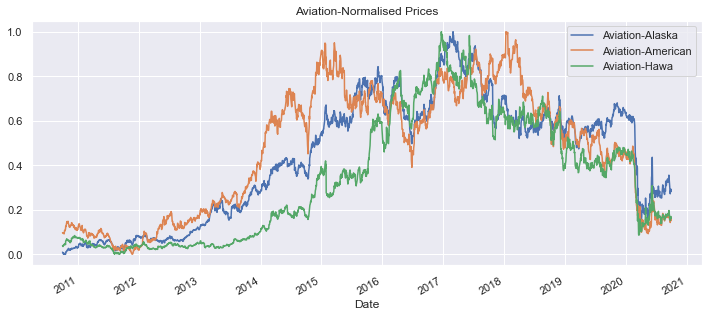

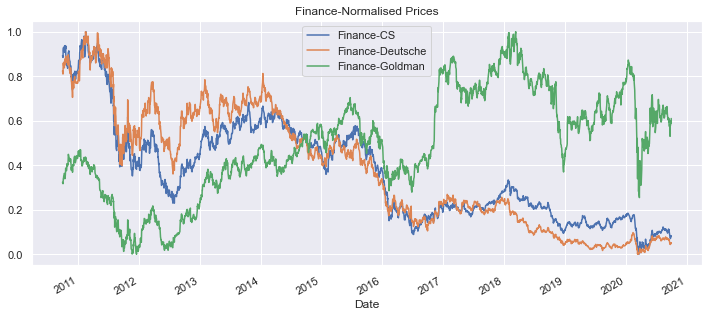

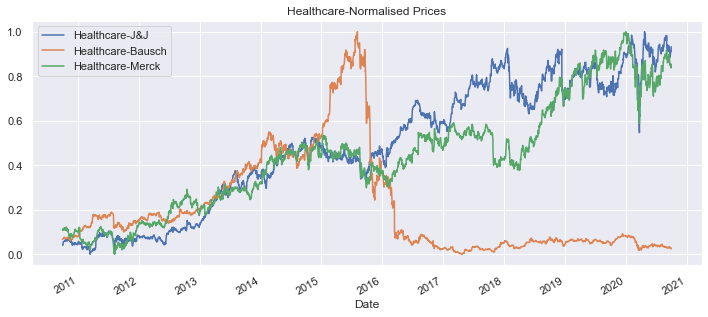

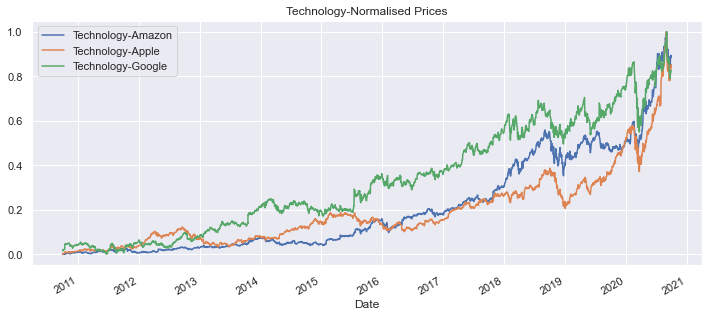

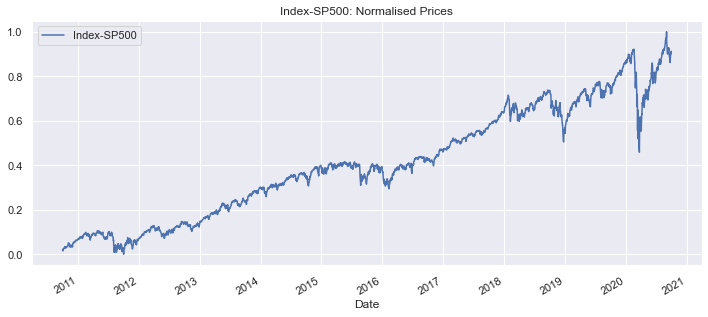

In [47]:
# Plot the stocks of Aviation
price_normalized[['Aviation-Alaska', 'Aviation-American', 'Aviation-Hawa']].plot(subplots=False, title = 'Aviation-Normalised Prices', figsize=(12,5))

# Plot the stocks of Finance
price_normalized[['Finance-CS', 'Finance-Deutsche', 'Finance-Goldman']].plot(subplots=False, title="Finance-Normalised Prices", figsize=(12,5))

# Plot the stocks of Healthcare
price_normalized[['Healthcare-J&J', 'Healthcare-Bausch', 'Healthcare-Merck']].plot(subplots=False, title="Healthcare-Normalised Prices", figsize=(12,5))

# Plot the stocks of Technology
price_normalized[['Technology-Amazon', 'Technology-Apple', 'Technology-Google']].plot(subplots=False, title="Technology-Normalised Prices", figsize=(12,5))

# Plot the stocks of Index
price_normalized[['Index-SP500']].plot(subplots=False, title="Index-SP500: Normalised Prices", figsize=(12,5))

plt.show()

### Observation:
1. In aviation industry, all the three companies show a downtrend
2. In healthcare - Jhonson &Jhonson and Bausche show uptrend
3. In Finance - All three show downtrend; however the level of prices and the rate of downtrend vary. The price levels of Bausche is higher than the other two.
4. In technology, all the three are showing an uptrend.

### 3.2.5. Relative Strength Index of Stocks: Stock Price with respect to Index

Its a composite index which helps to compare the movement of stock price with respect to the index

RSI = Price of Stock/Price of Index

In [48]:
# Calculate Relative strength index of each stock with respect to the Market index
rsi = prices.copy()
for column in rsi.columns:
    rsi[column] = rsi[column]/rsi['Index-SP500']

In [49]:
# Checking the data
rsi.head()

,Aviation-Alaska,Aviation-American,Aviation-Hawa,Finance-CS,Finance-Deutsche,Finance-Goldman,Healthcare-Bausch,Healthcare-J&J,Healthcare-Merck,Index-SP500,Technology-Amazon,Technology-Apple,Technology-Google
Date,,,,,,,,,,,,,
2010-10-01,0.010859,0.008105,0.005200,0.036839,0.045885,0.128856,0.022465,0.053872,0.031930,1.0,153.710007,10.090000,261.828613
2010-10-04,0.010679,0.008021,0.005057,0.036863,0.045518,0.128906,0.022752,0.054238,0.032119,1.0,155.389999,9.951428,260.199707
2010-10-05,0.010523,0.007952,0.005040,0.037178,0.046479,0.128856,0.022658,0.054103,0.031893,1.0,160.869995,10.319285,268.110046
2010-10-06,0.010507,0.007957,0.005147,0.037447,0.047078,0.130038,0.023009,0.054493,0.031906,1.0,155.399994,10.328215,266.177307
2010-10-07,0.010038,0.007979,0.005311,0.037711,0.046661,0.130485,0.022969,0.054591,0.031700,1.0,156.270004,10.329286,264.015411


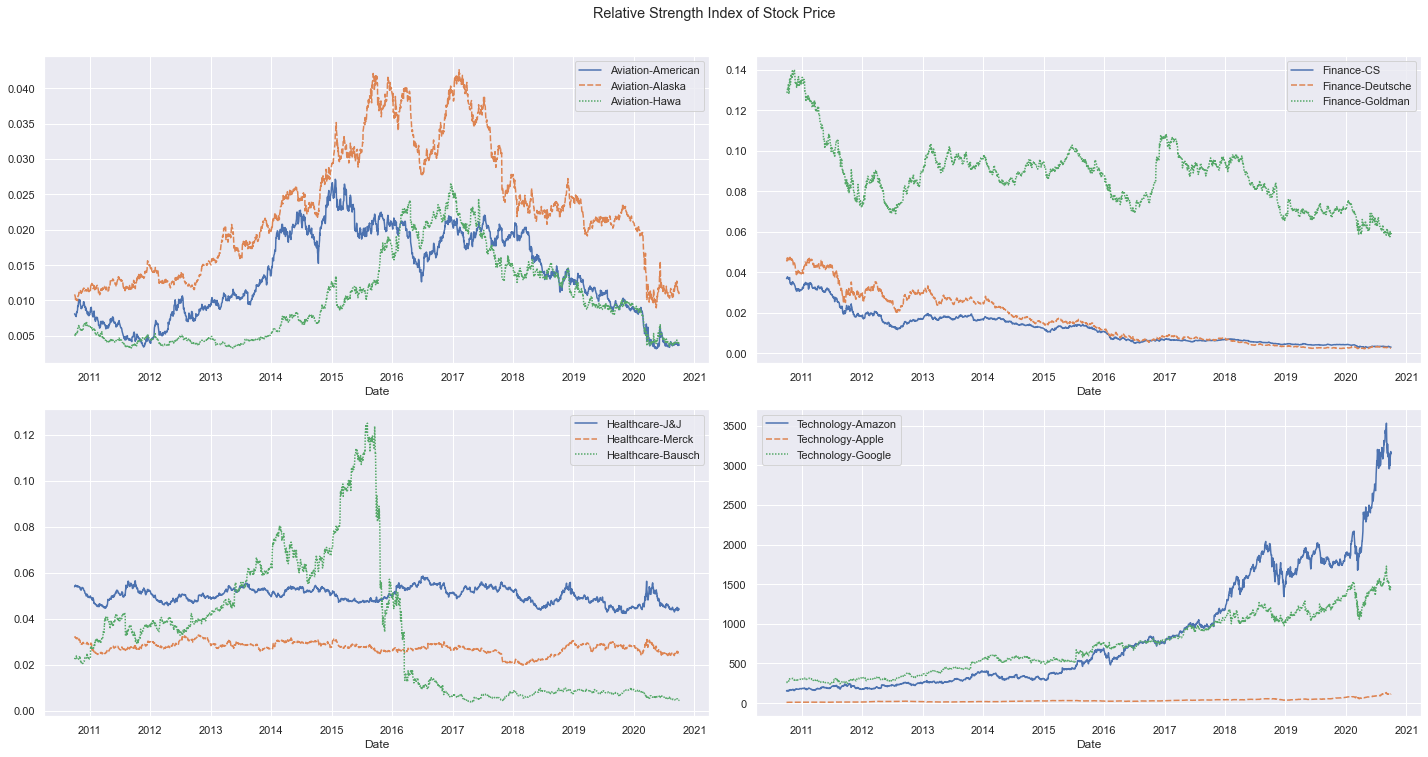

In [50]:
# Plotting the Relative Stock Price change 
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.lineplot(data = rsi[['Aviation-American','Aviation-Alaska','Aviation-Hawa']])
plt.legend(loc='best')
plt.tight_layout()
plt.subplot(2,2,2)
sns.lineplot(data = rsi[['Finance-CS','Finance-Deutsche','Finance-Goldman']])
plt.tight_layout()
plt.subplot(2,2,3)
sns.lineplot(data = rsi[['Healthcare-J&J','Healthcare-Merck','Healthcare-Bausch',]])
plt.legend(loc='best')
plt.tight_layout()
plt.subplot(2,2,4)
sns.lineplot(data = rsi[['Technology-Amazon','Technology-Apple', 'Technology-Google']])
plt.legend(loc='best')
plt.tight_layout()
plt.suptitle("Relative Strength Index of Stock Price",y=1.05)
plt.show()

### Observation: 
1. The relative strength Index also confirms the earlier findings. The only industry in uptrend is Technology; Although their price levels are highly different
2. In healthcare, J&J and Bausche move parallelly with the index. 
3. Stocks in Healthcare and Finance industry show a downtrend. 

### 4. Stock anaysis to find most suitable stock 

Analysis of stocks is done to select the stocks that are most suitable in line with the finanical goals of the client. 
The steps include, analysing the performance of each stock based on key metrics and selection of most suitable stocks to build portfolio.


### 4.1. Evaluate stocks based on key metrics of CAPM 

The metrics include
1. Daily returns
2. Annulaized (daily)returns
3. Cumulative returns
4. Annualized Risk
5. Sharpe Ratio
6. Beta
7. Expected Returns

#### 4.1.1. Daily Return
This is the percentage change in the prices from previous day

In [51]:
# Calculte daily returns
daily_returns = prices.pct_change()

daily_returns = round((daily_returns[1:]*100),2)
daily_returns.head()

,Aviation-Alaska,Aviation-American,Aviation-Hawa,Finance-CS,Finance-Deutsche,Finance-Goldman,Healthcare-Bausch,Healthcare-J&J,Healthcare-Merck,Index-SP500,Technology-Amazon,Technology-Apple,Technology-Google
Date,,,,,,,,,,,,,
2010-10-04,-2.45,-1.83,-3.52,-0.74,-1.60,-0.77,0.47,-0.13,-0.22,-0.80,1.09,-1.37,-0.62
2010-10-05,0.60,1.21,1.74,2.96,4.24,2.05,1.66,1.83,1.37,2.09,3.53,3.70,3.04
2010-10-06,-0.23,0.00,2.05,0.66,1.22,0.85,1.48,0.65,-0.03,-0.07,-3.40,0.09,-0.72
2010-10-07,-4.62,0.11,3.02,0.54,-1.05,0.18,-0.34,0.02,-0.81,-0.16,0.56,0.01,-0.81
2010-10-08,3.63,-1.84,0.00,-1.57,-0.30,1.03,0.90,0.02,0.54,0.61,-0.46,1.68,1.20


In [52]:
list(prices.columns)

['Aviation-Alaska',
 'Aviation-American',
 'Aviation-Hawa',
 'Finance-CS',
 'Finance-Deutsche',
 'Finance-Goldman',
 'Healthcare-Bausch',
 'Healthcare-J&J',
 'Healthcare-Merck',
 'Index-SP500',
 'Technology-Amazon',
 'Technology-Apple',
 'Technology-Google']

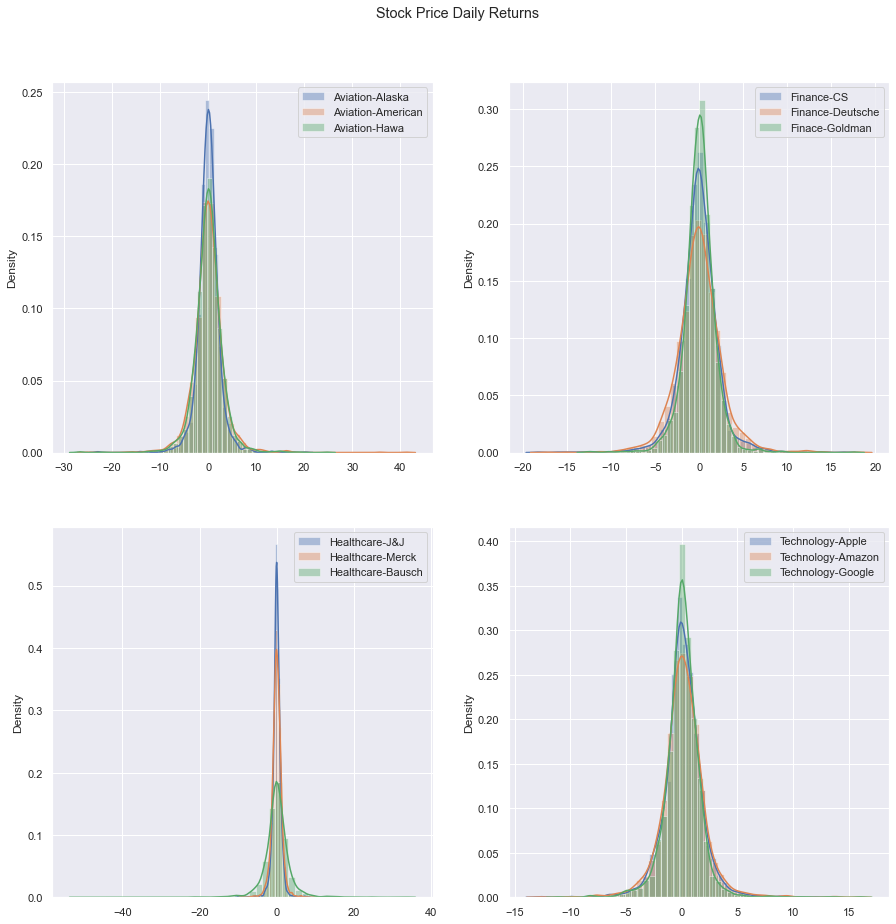

In [53]:
# Visualise the spread in daily return through histogram
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.distplot(daily_returns[['Aviation-Alaska']],hist=True,label='Aviation-Alaska')
sns.distplot(daily_returns[['Aviation-American']],hist=True,label="Aviation-American")
sns.distplot(daily_returns[['Aviation-Hawa']],hist=True,label="Aviation-Hawa")
plt.legend()
                            
plt.subplot(2,2,2)
sns.distplot(daily_returns[['Finance-CS']],hist=True,label="Finance-CS")
sns.distplot(daily_returns[['Finance-Deutsche']],hist=True,label="Finance-Deutsche")
sns.distplot(daily_returns[['Finance-Goldman']],hist=True,label="Finace-Goldman")
plt.legend()
                            
plt.subplot(2,2,3)
sns.distplot(daily_returns[['Healthcare-J&J']],hist=True,label="Healthcare-J&J")
sns.distplot(daily_returns[['Healthcare-Merck']],hist=True,label="Healthcare-Merck")
sns.distplot(daily_returns[['Healthcare-Bausch']],hist=True,label="Healthcare-Bausch")
plt.legend()
plt.subplot(2,2,4)
sns.distplot(daily_returns[['Technology-Apple']],hist=True,label="Technology-Apple")
sns.distplot(daily_returns[['Technology-Amazon']],hist=True,label="Technology-Amazon")
sns.distplot(daily_returns[['Technology-Google']],hist=True,label="Technology-Google")
plt.legend()
plt.suptitle("Stock Price Daily Returns",y=0.95)
plt.show()

In [54]:
# Checking the statistical values for daily returns of stocks
daily_returns.describe()

,Aviation-Alaska,Aviation-American,Aviation-Hawa,Finance-CS,Finance-Deutsche,Finance-Goldman,Healthcare-Bausch,Healthcare-J&J,Healthcare-Merck,Index-SP500,Technology-Amazon,Technology-Apple,Technology-Google
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,0.070910,0.063605,0.076546,-0.032508,-0.038164,0.029062,0.046475,0.040855,0.041045,0.048752,0.139754,0.112683,0.081765
std,2.356139,3.272582,3.014725,2.220487,2.637406,1.833194,3.569884,1.084655,1.304925,1.093387,1.989001,1.771761,1.628830
min,-23.240000,-25.220000,-26.970000,-18.260000,-17.490000,-12.710000,-51.460000,-10.040000,-8.900000,-11.980000,-12.660000,-12.860000,-11.100000
25%,-1.010000,-1.410000,-1.380000,-1.090000,-1.392500,-0.840000,-1.300000,-0.430000,-0.610000,-0.330000,-0.812500,-0.700000,-0.640000
50%,0.080000,0.020000,0.045000,0.000000,-0.050000,0.050000,0.040000,0.030000,0.030000,0.065000,0.110000,0.090000,0.070000
75%,1.162500,1.562500,1.530000,1.080000,1.370000,0.942500,1.500000,0.570000,0.730000,0.520000,1.150000,1.020000,0.862500
max,20.310000,41.100000,24.580000,16.340000,17.950000,17.580000,33.740000,8.000000,10.410000,9.380000,15.750000,11.980000,16.050000


#### Observation:
From the above table we can observe that the level of price variation each day. However,this won't be sufficient to draw any inference. Hence fro the daily returns, annualised daily returns need to be calculated for each stock.

#### 4.1.2. Annualized (Daily) Returns
Steps include:
1. Calculate the annualised daily return
Annualised daily return = Mean of daily returns *252; As the markets function for about 252 days in a year, this is taken for calculating the annualized daily return.
2. Create a new Risk-Return dataframe to store the result

In [55]:
#Calculating Annualized Returns

annualized_returns = []
col=[]

for i in daily_returns.columns:
    col.append(i)

for i in daily_returns.columns:
    annualized_returns.append(daily_returns[i].mean()*252)

In [56]:
# Creating a dataframe for mapping the risk return metrics of stocks
capm_df=pd.DataFrame(list(zip(col,annualized_returns)),columns =['Stocks', 'Annualized Returns'])

In [57]:
# Renaming the names of stocks
for i in capm_df.index:
    capm_df['Stocks'][i]=capm_df['Stocks'][i].replace("Close_","")

In [58]:
# Checking the data
capm_df['Annualized Returns']=round(capm_df['Annualized Returns'],2)
capm_df

,Stocks,Annualized Returns
0,Aviation-Alaska,17.87
1,Aviation-American,16.03
2,Aviation-Hawa,19.29
3,Finance-CS,-8.19
4,Finance-Deutsche,-9.62
5,Finance-Goldman,7.32
6,Healthcare-Bausch,11.71
7,Healthcare-J&J,10.30
8,Healthcare-Merck,10.34
9,Index-SP500,12.29


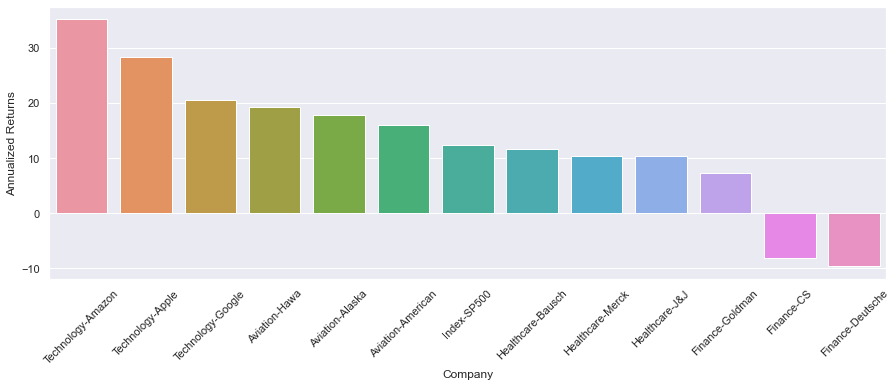

In [59]:
# Plot the Annualized (Daily) returns
plt.figure(figsize=[15,5])
sns.barplot(data=capm_df.sort_values("Annualized Returns", ascending=False),x="Stocks",y="Annualized Returns")
plt.xticks(rotation=45)
plt.xlabel('Company') 
plt.show()

### Observation:
1. All tech stocks have given positive returns; The highest returns have been from Amazon followed by Apple and then Google.These are the top three among the 12 stocks as well. 
2. Aviation stocks performed better next to tech companies; all are positve and above the SP500 index. 
3. In healthcare also all three stocks show positive annualised (daily) return; however, the returns are lesser than SP500.
4. Under finance sector, except Goldman, the other two gave negative returns.

Next cumulative return from all the stocks for the entire perid need to be computed.

#### 4.1.3. Cumulative Return
Steps include:
1. Calculate the cumulative return
Cumulative return = ((Oldest price/Latest price)-1)*100
2. Add the result in the Risk-Return dataframe created already

In [60]:
#Calculating Cummulative_returns

cum_return =[]
for i in daily_returns.columns:
    cum_return.append(prices[i][-1]/prices[i][0]-1)

In [61]:
# Adding Cumulative_ret column to the dataframe
capm_df['Cumulative Return']= cum_return

capm_df['Cumulative Return']=round(capm_df['Cumulative Return'],4)*100

In [62]:
capm_df

,Stocks,Annualized Returns,Cumulative Return
0,Aviation-Alaska,17.87,194.28
1,Aviation-American,16.03,32.29
2,Aviation-Hawa,19.29,116.28
3,Finance-CS,-8.19,-76.39
4,Finance-Deutsche,-9.62,-84.03
5,Finance-Goldman,7.32,36.07
6,Healthcare-Bausch,11.71,-39.65
7,Healthcare-J&J,10.30,141.10
8,Healthcare-Merck,10.34,126.64
9,Index-SP500,12.29,193.39


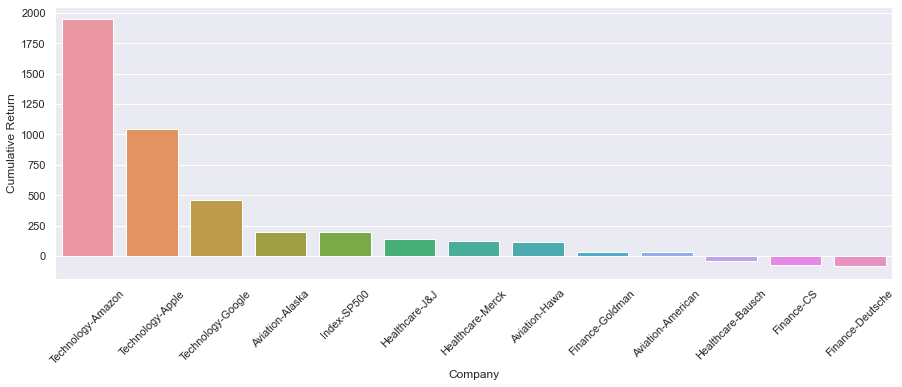

In [63]:
# Plot the Cumulative return of all the stocks
plt.figure(figsize=[15,5])
sns.barplot(data=capm_df.sort_values("Cumulative Return", ascending=False),x="Stocks",y="Cumulative Return")
plt.xticks(rotation=45)
plt.xlabel('Company') 
plt.show()

### Observation:
1. Highest cumulative returns have been provided by technology stocks.
2. There are three stocks with negative returns two from finance and one from finance.
3. To meet the investment goals of the client, we will not include any stocks giving negative returns in the portfolio.

#### 4.1.4. Annualized Risk
The risk is measured by way of standard deviation. Although its viewed through describe function earlier, it needs to be worked out separately and appended with the Risk-Return dataframe.

Steps include,
1. Calculate annualized risk
2. Add the result in the Risk-Return dataframe

In [64]:
#Calculating Annualized_Risk
annualized_risk = []

for i in daily_returns.columns:
    annualized_risk.append(daily_returns[i].std()*np.sqrt(252))

In [65]:
# Adding Annualized Risk column to the dataframe
capm_df['Annualized Risk']= annualized_risk

capm_df['Annualized Risk']=round(capm_df['Annualized Risk'],2)

In [66]:
# Checking the data
capm_df

,Stocks,Annualized Returns,Cumulative Return,Annualized Risk
0,Aviation-Alaska,17.87,194.28,37.40
1,Aviation-American,16.03,32.29,51.95
2,Aviation-Hawa,19.29,116.28,47.86
3,Finance-CS,-8.19,-76.39,35.25
4,Finance-Deutsche,-9.62,-84.03,41.87
5,Finance-Goldman,7.32,36.07,29.10
6,Healthcare-Bausch,11.71,-39.65,56.67
7,Healthcare-J&J,10.30,141.10,17.22
8,Healthcare-Merck,10.34,126.64,20.72
9,Index-SP500,12.29,193.39,17.36


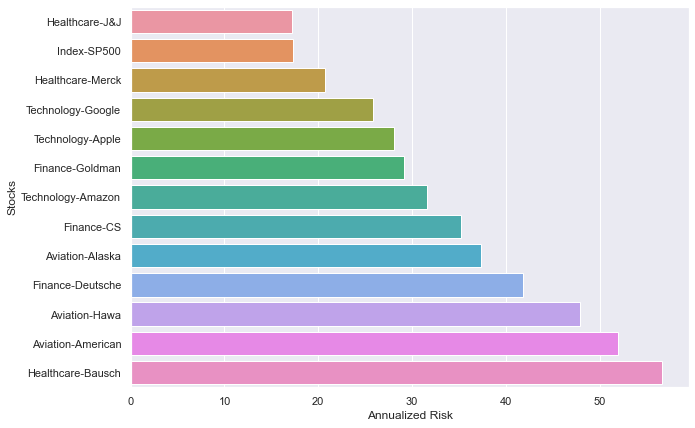

In [67]:
plt.figure(figsize=[10,7])
sns.barplot(data=capm_df.sort_values('Annualized Risk', ascending=True),x="Annualized Risk",y="Stocks", label = 'Annualized Risk')
plt.xlabel('Annualized Risk') 
plt.show()

### Observation:
1. Risk is high among all the stocks of aviation industry.
2. In Finance industry, all stocks are riskier than the index; 
3. Healthcare industry has the most risky and least risky stocks; Bausch is the riskiest among all the stocks in other industry as well while Jhonson &Jhonson is has the least annualised risk and the only stock which is less riskier than the index among all. 
4. All the three stocks in Technology industry stocks have moderate risk.

#### 4.1.5. Sharpe Ratio

This is one of the key metric under Capital Asset Pricing model. This is a composite index that considers both risk as well as return of a stock. A Sharpe ratio of 1 and above is a good performance. Stocks with negative value must be avoided.

Steps include:
1. Calculate the sharpe ratio
2. Add the result in the Risk-Return dataframe

In [68]:
#Calculating Sharpe Ratio with a Risk Free Rate of Return of 0.75%
capm_df['Sharpe Ratio'] = round((capm_df['Annualized Returns']-0.0075)/capm_df['Annualized Risk'],2)

In [69]:
capm_df

,Stocks,Annualized Returns,Cumulative Return,Annualized Risk,Sharpe Ratio
0,Aviation-Alaska,17.87,194.28,37.40,0.48
1,Aviation-American,16.03,32.29,51.95,0.31
2,Aviation-Hawa,19.29,116.28,47.86,0.40
3,Finance-CS,-8.19,-76.39,35.25,-0.23
4,Finance-Deutsche,-9.62,-84.03,41.87,-0.23
5,Finance-Goldman,7.32,36.07,29.10,0.25
6,Healthcare-Bausch,11.71,-39.65,56.67,0.21
7,Healthcare-J&J,10.30,141.10,17.22,0.60
8,Healthcare-Merck,10.34,126.64,20.72,0.50
9,Index-SP500,12.29,193.39,17.36,0.71


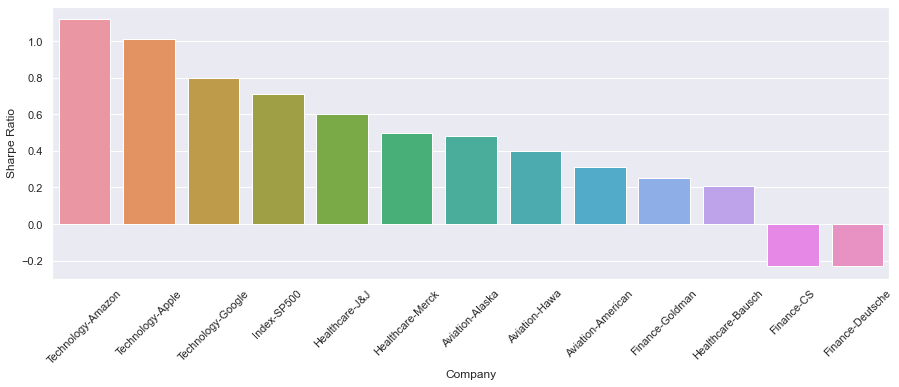

In [70]:
# Plot the Annualized Risk of all the stocks
plt.figure(figsize=[15,5])
sns.barplot(data=capm_df.sort_values("Sharpe Ratio", ascending=False),x="Stocks",y="Sharpe Ratio")
plt.xticks(rotation=45)
plt.xlabel('Company') 
plt.show()

# plt.figure(figsize=[10,7])
# sns.barplot(data=capm_df.sort_values('Sharpe Ratio', ascending=False),x="Sharpe Ratio",y="Stocks", label = 'Sharpe Ratio')
# plt.xlabel('Sharpe Ratio') 
# plt.show()

#### 4.1.6. Beta for the stocks

Beta is a measure of voltility. It indicates how much the price of a stock tends to fluctuate up and down compared to market.

It helps to determine the expected return from the stock.

In [71]:
Beta=[]
for i in range (0,13):

    def find_beta(df):
        np_array = df.values
        m = np_array[:,9] # market returns are column zero from numpy array
        s = np_array[:,i] # stock returns are column one from numpy array
        covariance = np.cov(s,m) # Calculate covariance between stock and market
        beta = covariance[0,1]/covariance[1,1]
        return Beta.append(beta)
    find_beta(daily_returns)

In [72]:
Beta = pd.DataFrame(Beta, index =daily_returns.columns.values,columns =['Beta'])
Beta

,Beta
Aviation-Alaska,1.231484
Aviation-American,1.353639
Aviation-Hawa,1.233664
Finance-CS,1.369945
Finance-Deutsche,1.537556
Finance-Goldman,1.301359
Healthcare-Bausch,1.315965
Healthcare-J&J,0.662243
Healthcare-Merck,0.733472
Index-SP500,1.000000


In [73]:
Beta_reset = Beta.reset_index()
# plt.figure(figsize=[15,5])
# sns.barplot(data=Beta_reset,x="index",y="Beta")
# plt.xticks(rotation=45)
# plt.xlabel('Company') 
# plt.show()

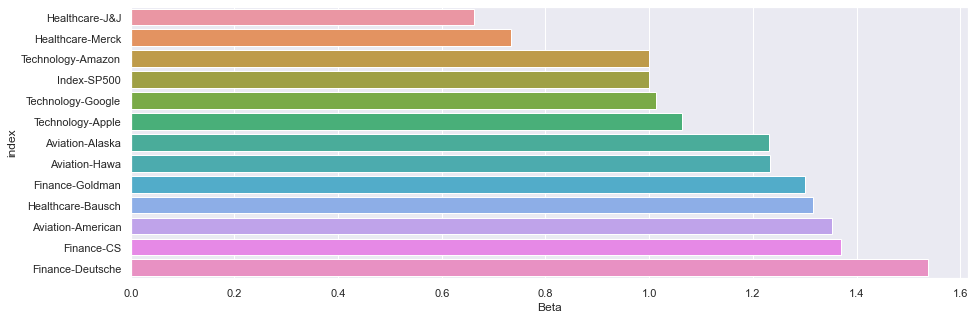

In [74]:
plt.figure(figsize=[15,5])
sns.barplot(data=Beta_reset.sort_values('Beta', ascending=True),x="Beta",y="index", label = 'Beta')
plt.xlabel('Beta') 
plt.show()

In [75]:
capm_df

,Stocks,Annualized Returns,Cumulative Return,Annualized Risk,Sharpe Ratio
0,Aviation-Alaska,17.87,194.28,37.40,0.48
1,Aviation-American,16.03,32.29,51.95,0.31
2,Aviation-Hawa,19.29,116.28,47.86,0.40
3,Finance-CS,-8.19,-76.39,35.25,-0.23
4,Finance-Deutsche,-9.62,-84.03,41.87,-0.23
5,Finance-Goldman,7.32,36.07,29.10,0.25
6,Healthcare-Bausch,11.71,-39.65,56.67,0.21
7,Healthcare-J&J,10.30,141.10,17.22,0.60
8,Healthcare-Merck,10.34,126.64,20.72,0.50
9,Index-SP500,12.29,193.39,17.36,0.71


In [76]:
capm_df=capm_df.set_index('Stocks')

In [77]:
capm_df

,Annualized Returns,Cumulative Return,Annualized Risk,Sharpe Ratio
Stocks,,,,
Aviation-Alaska,17.87,194.28,37.40,0.48
Aviation-American,16.03,32.29,51.95,0.31
Aviation-Hawa,19.29,116.28,47.86,0.40
Finance-CS,-8.19,-76.39,35.25,-0.23
Finance-Deutsche,-9.62,-84.03,41.87,-0.23
Finance-Goldman,7.32,36.07,29.10,0.25
Healthcare-Bausch,11.71,-39.65,56.67,0.21
Healthcare-J&J,10.30,141.10,17.22,0.60
Healthcare-Merck,10.34,126.64,20.72,0.50


In [78]:
capm_df=pd.concat([capm_df, Beta['Beta']], axis=1)
capm_df

,Annualized Returns,Cumulative Return,Annualized Risk,Sharpe Ratio,Beta
Aviation-Alaska,17.87,194.28,37.40,0.48,1.231484
Aviation-American,16.03,32.29,51.95,0.31,1.353639
Aviation-Hawa,19.29,116.28,47.86,0.40,1.233664
Finance-CS,-8.19,-76.39,35.25,-0.23,1.369945
Finance-Deutsche,-9.62,-84.03,41.87,-0.23,1.537556
Finance-Goldman,7.32,36.07,29.10,0.25,1.301359
Healthcare-Bausch,11.71,-39.65,56.67,0.21,1.315965
Healthcare-J&J,10.30,141.10,17.22,0.60,0.662243
Healthcare-Merck,10.34,126.64,20.72,0.50,0.733472
Index-SP500,12.29,193.39,17.36,0.71,1.000000


#### Observation: 
1. Less volatile stocks (Beta <1) : J&J, Merck and Amazon show lesser volatility than the market 
2. High volatile stocks (Beta >1) : All other stocks. However, Apple and Google are only marginally higher than the market' volatility.

#### 4.1.7. Expected Returns

Expected Return = Risk free return +Beta * (Market retun - Risk free return)

In [79]:
rm=capm_df['Annualized Returns'].iloc[-4]

In [80]:
# Create a column for expected return
capm_df['Expected Return'] = 0.75+capm_df['Beta']*(rm-0.75)

In [81]:
capm_df

,Annualized Returns,Cumulative Return,Annualized Risk,Sharpe Ratio,Beta,Expected Return
Aviation-Alaska,17.87,194.28,37.40,0.48,1.231484,14.961331
Aviation-American,16.03,32.29,51.95,0.31,1.353639,16.370992
Aviation-Hawa,19.29,116.28,47.86,0.40,1.233664,14.986488
Finance-CS,-8.19,-76.39,35.25,-0.23,1.369945,16.559167
Finance-Deutsche,-9.62,-84.03,41.87,-0.23,1.537556,18.493391
Finance-Goldman,7.32,36.07,29.10,0.25,1.301359,15.767683
Healthcare-Bausch,11.71,-39.65,56.67,0.21,1.315965,15.936240
Healthcare-J&J,10.30,141.10,17.22,0.60,0.662243,8.392285
Healthcare-Merck,10.34,126.64,20.72,0.50,0.733472,9.214265
Index-SP500,12.29,193.39,17.36,0.71,1.000000,12.290000


In [82]:
# Plot the Expected Return of all the stocks
capm_df=capm_df.reset_index()

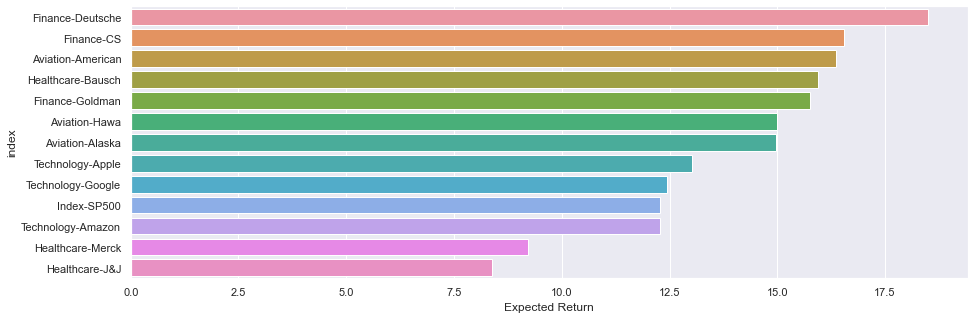

In [83]:
plt.figure(figsize=[15,5])
sns.barplot(data=capm_df.sort_values('Expected Return', ascending=False),x="Expected Return",y="index", label = 'Expected Return')
plt.xlabel('Expected Return') 
plt.show()

In [84]:
capm_df.to_csv('capm1.csv')

#### Now that we have completed the analysis of stocks using key metrics of CAPM, we need to proceed with building appropriate portfolio based on the need of the client after scrutizing each stock based on these metrics.

### 4.2. Select stocks and Build portfolio

Portfolio needs to be built according to the persona and business goals of the client. This include:

1. Alexandra is a daughter of Ukranian business tycoon and is studying in a college in the US.
2. Intends to form an NGO later with friends and refused to take money from parents for this purpose.
3. Has huge savings from the money sent by parents but doesn’t disclose how much
4. Wants to invest the money during her college and use the matured amount for the NGO
5. She is a conservative investor and wants to invest in stocks that gives good returns but are also stable
6. She is an active investor and wants a comprehensive report on all the metrics used to devise the investment strategy
 
We may have to assume the following:
1. Let the investment amount be 500000 USD
2. Let's assume she is in the first year of her 3 year degree; hence her investment term can be 3 years.

Considering the above, we need to build a portfolio consisting of stocks with good returns and low to moderate risk that are less volatile.

#### 4.2.1. Selection of stocks for the portfolio 
We set the following criteria for selection of stocks for the portfolio:
1. Stocks with positive annualized returns
2. Positive cumulative returns
3. Sharpe Ratio more than Index
4. Beta on par with the Market index
5. Stocks with positive expected returns 

In [85]:
capm_df=capm_df.reset_index()

In [86]:
capm_df

,level_0,index,Annualized Returns,Cumulative Return,Annualized Risk,Sharpe Ratio,Beta,Expected Return
0,0,Aviation-Alaska,17.87,194.28,37.40,0.48,1.231484,14.961331
1,1,Aviation-American,16.03,32.29,51.95,0.31,1.353639,16.370992
2,2,Aviation-Hawa,19.29,116.28,47.86,0.40,1.233664,14.986488
3,3,Finance-CS,-8.19,-76.39,35.25,-0.23,1.369945,16.559167
4,4,Finance-Deutsche,-9.62,-84.03,41.87,-0.23,1.537556,18.493391
5,5,Finance-Goldman,7.32,36.07,29.10,0.25,1.301359,15.767683
6,6,Healthcare-Bausch,11.71,-39.65,56.67,0.21,1.315965,15.936240
7,7,Healthcare-J&J,10.30,141.10,17.22,0.60,0.662243,8.392285
8,8,Healthcare-Merck,10.34,126.64,20.72,0.50,0.733472,9.214265
9,9,Index-SP500,12.29,193.39,17.36,0.71,1.000000,12.290000


In [87]:
# Dropping the Stocks having negetive Annualized returns
portfolio=capm_df.loc[(capm_df['Annualized Returns'] > 0.0)]
portfolio

,level_0,index,Annualized Returns,Cumulative Return,Annualized Risk,Sharpe Ratio,Beta,Expected Return
0,0,Aviation-Alaska,17.87,194.28,37.40,0.48,1.231484,14.961331
1,1,Aviation-American,16.03,32.29,51.95,0.31,1.353639,16.370992
2,2,Aviation-Hawa,19.29,116.28,47.86,0.40,1.233664,14.986488
5,5,Finance-Goldman,7.32,36.07,29.10,0.25,1.301359,15.767683
6,6,Healthcare-Bausch,11.71,-39.65,56.67,0.21,1.315965,15.936240
7,7,Healthcare-J&J,10.30,141.10,17.22,0.60,0.662243,8.392285
8,8,Healthcare-Merck,10.34,126.64,20.72,0.50,0.733472,9.214265
9,9,Index-SP500,12.29,193.39,17.36,0.71,1.000000,12.290000
10,10,Technology-Amazon,35.22,1948.49,31.57,1.12,0.998854,12.276777
11,11,Technology-Apple,28.40,1047.77,28.13,1.01,1.063317,13.020675


In [88]:
# Dropping the Stocks having negetive Cummulative returns
portfolio=portfolio.loc[(portfolio ['Cumulative Return'] > 0)]
portfolio

,level_0,index,Annualized Returns,Cumulative Return,Annualized Risk,Sharpe Ratio,Beta,Expected Return
0,0,Aviation-Alaska,17.87,194.28,37.40,0.48,1.231484,14.961331
1,1,Aviation-American,16.03,32.29,51.95,0.31,1.353639,16.370992
2,2,Aviation-Hawa,19.29,116.28,47.86,0.40,1.233664,14.986488
5,5,Finance-Goldman,7.32,36.07,29.10,0.25,1.301359,15.767683
7,7,Healthcare-J&J,10.30,141.10,17.22,0.60,0.662243,8.392285
8,8,Healthcare-Merck,10.34,126.64,20.72,0.50,0.733472,9.214265
9,9,Index-SP500,12.29,193.39,17.36,0.71,1.000000,12.290000
10,10,Technology-Amazon,35.22,1948.49,31.57,1.12,0.998854,12.276777
11,11,Technology-Apple,28.40,1047.77,28.13,1.01,1.063317,13.020675
12,12,Technology-Google,20.60,461.28,25.86,0.80,1.013406,12.444706


In [89]:
# Dropping the Stocks having Sharpe Ratio more than index
sharpe_index=portfolio['Sharpe Ratio'].iloc[-4]
portfolio=capm_df.loc[(capm_df['Sharpe Ratio'] > sharpe_index)]
portfolio

,level_0,index,Annualized Returns,Cumulative Return,Annualized Risk,Sharpe Ratio,Beta,Expected Return
10,10,Technology-Amazon,35.22,1948.49,31.57,1.12,0.998854,12.276777
11,11,Technology-Apple,28.40,1047.77,28.13,1.01,1.063317,13.020675
12,12,Technology-Google,20.60,461.28,25.86,0.80,1.013406,12.444706


In [90]:
portfolio.columns

Index(['level_0', 'index', 'Annualized Returns', 'Cumulative Return',
       'Annualized Risk', 'Sharpe Ratio', 'Beta', 'Expected Return'],
      dtype='object')

In [91]:
portfolio.drop(['level_0'], axis=1)

,index,Annualized Returns,Cumulative Return,Annualized Risk,Sharpe Ratio,Beta,Expected Return
10,Technology-Amazon,35.22,1948.49,31.57,1.12,0.998854,12.276777
11,Technology-Apple,28.40,1047.77,28.13,1.01,1.063317,13.020675
12,Technology-Google,20.60,461.28,25.86,0.80,1.013406,12.444706


In [92]:
portfolio= portfolio.set_index('index')

In [93]:
portfolio

,level_0,Annualized Returns,Cumulative Return,Annualized Risk,Sharpe Ratio,Beta,Expected Return
index,,,,,,,
Technology-Amazon,10,35.22,1948.49,31.57,1.12,0.998854,12.276777
Technology-Apple,11,28.40,1047.77,28.13,1.01,1.063317,13.020675
Technology-Google,12,20.60,461.28,25.86,0.80,1.013406,12.444706


In [94]:
portfolio.drop(['level_0'], axis=1)

,Annualized Returns,Cumulative Return,Annualized Risk,Sharpe Ratio,Beta,Expected Return
index,,,,,,
Technology-Amazon,35.22,1948.49,31.57,1.12,0.998854,12.276777
Technology-Apple,28.40,1047.77,28.13,1.01,1.063317,13.020675
Technology-Google,20.60,461.28,25.86,0.80,1.013406,12.444706


#### Observation:
The final portfolio comprises of Amazon, Google and Apple in the order of their beta.
We can also see that as the beta increases, the expected return also increases. This implies the stocks with higher expected return are associated with high volatility.


#### 4.2.2. Find the overall value of the Portfolio

In [95]:
# Calculate return from the chosen portfolio
# The investment amount is assumed to be 500000 USD
investment=500000
portfolio_stocklist =['Technology-Amazon','Technology-Apple', "Technology-Google"]
weight = 1/len(portfolio_stocklist)

portfolio["Stock Return"] = portfolio["Cumulative Return"]
portfolio["Invested Amount"] = investment*weight
portfolio["Stock Value"] = round(portfolio["Invested Amount"] * (1+portfolio["Stock Return"]/100),2)
portfolio

,level_0,Annualized Returns,Cumulative Return,Annualized Risk,Sharpe Ratio,Beta,Expected Return,Stock Return,Invested Amount,Stock Value
index,,,,,,,,,,
Technology-Amazon,10,35.22,1948.49,31.57,1.12,0.998854,12.276777,1948.49,166666.666667,3414150.00
Technology-Apple,11,28.40,1047.77,28.13,1.01,1.063317,13.020675,1047.77,166666.666667,1912950.00
Technology-Google,12,20.60,461.28,25.86,0.80,1.013406,12.444706,461.28,166666.666667,935466.67


In [96]:
portfolio=portfolio.reset_index()

In [97]:
portfolio=portfolio.drop(['level_0'], axis=1)

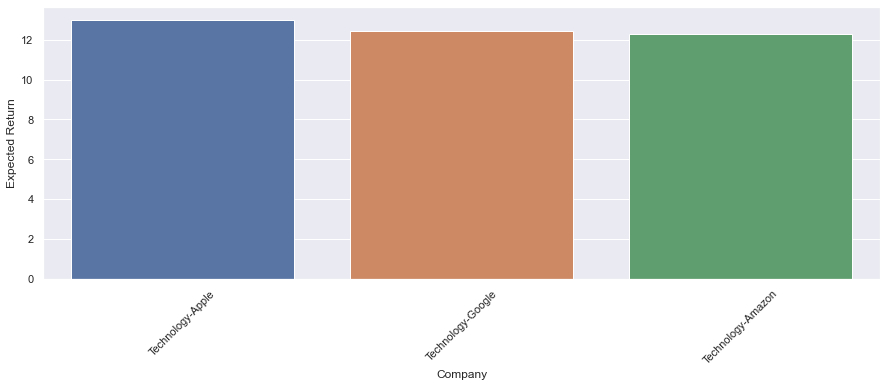

In [98]:
# plt.figure(figsize=[15,5])
# sns.barplot(data=Beta_reset.sort_values('Beta', ascending=True),x="Beta",y="index", label = 'Beta')
# plt.xlabel('Beta') 
# plt.show()
plt.figure(figsize=[15,5])
sns.barplot(data=portfolio.sort_values("Expected Return", ascending=False),x="index",y="Expected Return")
plt.xticks(rotation=45)
plt.xlabel('Company') 
plt.show()

# plt.figure(figsize=[7,4])
# sns.barplot(data=portfolio.sort_values('Expected Return', ascending=False),x="Expected Return",y="index", label = 'Expected Return')
# plt.xlabel('Expected Return') 
# plt.show()

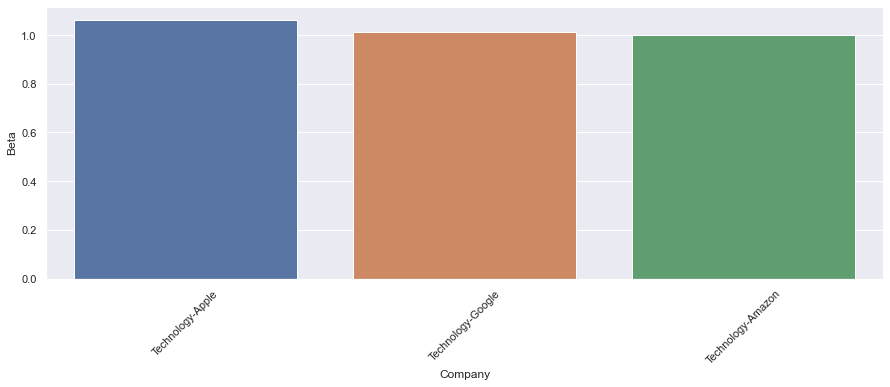

In [99]:
plt.figure(figsize=[15,5])
sns.barplot(data=portfolio.sort_values("Beta", ascending=False),x="index",y="Beta")
plt.xticks(rotation=45)
plt.xlabel('Company') 
plt.show()


In [100]:
# Value of Portfolio in 10 years 
portfolio_val = portfolio["Stock Value"].sum()
print(portfolio_val)

6262566.67


In [101]:
# Calculate the return on investment for 10 years
roi = ((portfolio_val - investment)/investment).round(2)
roi

11.53

In [102]:
# Annualized Rate of return for the 10 years
period = 10
roi_annual=((1+roi)**(1/period)-1).round(2)
roi_annual

0.29

In [103]:
#portfolio risk
portfolio_risk = (portfolio["Annualized Risk"]*weight).sum().round(2)
print(portfolio_risk)

28.52


#### Observation
1. The investment fund of 500,000 USD would have grown to 6.26 million USD in 10 years if invested equally in these 3 stocks.
2. The portfolio's annualised return on investment is 29%
3. Risk rate is 28% and for the index it is 17%

### 5. Stock Price Prediction and Predicting the Future Value of Portfolio

    5.1. Preparation
    5.2. Test for stationarity 
    5.3. seasonal decomposition
    5.4. Train -Test split
    5.5. Selection of Model 
    5.6. Find the future value of the chose stocks by the end of 3 years
    5.7. Build another portfolio and repeat step 1 to 4 above

### 5.1.Preparation 

In [104]:
# Explore the prices dataframe
prices.head()

,Aviation-Alaska,Aviation-American,Aviation-Hawa,Finance-CS,Finance-Deutsche,Finance-Goldman,Healthcare-Bausch,Healthcare-J&J,Healthcare-Merck,Index-SP500,Technology-Amazon,Technology-Apple,Technology-Google
Date,,,,,,,,,,,,,
2010-10-01,12.4475,9.29,5.96,42.226563,52.595421,147.699997,25.750000,61.750000,36.599998,1146.239990,153.710007,10.090000,261.828613
2010-10-04,12.1425,9.12,5.75,41.914063,51.755726,146.570007,25.870001,61.669998,36.520000,1137.030029,155.389999,9.951428,260.199707
2010-10-05,12.2150,9.23,5.85,43.154297,53.950382,149.570007,26.299999,62.799999,37.020000,1160.750000,160.869995,10.319285,268.110046
2010-10-06,12.1875,9.23,5.97,43.437500,54.608780,150.839996,26.690001,63.209999,37.009998,1159.969971,155.399994,10.328215,266.177307
2010-10-07,11.6250,9.24,6.15,43.671875,54.036259,151.110001,26.600000,63.220001,36.709999,1158.060059,156.270004,10.329286,264.015411


In [105]:
prices=prices.reset_index()

In [106]:
df=prices.drop(['Date','Aviation-Alaska','Aviation-American', 'Aviation-Hawa', 'Finance-CS', 'Finance-Deutsche',
                             'Finance-Goldman', 'Healthcare-Bausch', 'Healthcare-J&J','Healthcare-Merck', 'Index-SP500'],axis=1)

In [107]:
df.head()

,Technology-Amazon,Technology-Apple,Technology-Google
0,153.710007,10.090000,261.828613
1,155.389999,9.951428,260.199707
2,160.869995,10.319285,268.110046
3,155.399994,10.328215,266.177307
4,156.270004,10.329286,264.015411


In [108]:
df.rename(columns = {'Healthcare-J&J':'J&J', 'Technology-Amazon':'Amazon', 'Technology-Apple':'Apple', 'Technology-Google':'Google'}, inplace = True)

In [109]:
df.head()

,Amazon,Apple,Google
0,153.710007,10.090000,261.828613
1,155.389999,9.951428,260.199707
2,160.869995,10.319285,268.110046
3,155.399994,10.328215,266.177307
4,156.270004,10.329286,264.015411


### 5.2.Test for Stationarity

In [110]:
# Augmented Dickey-Fuller (ADF) test

from statsmodels.tsa.stattools import adfuller

for col in df.columns:
    adf_test = adfuller(df[col])

    print(col)
    print('ADF Statistic: %f' % adf_test[0])
    print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
    print('p-value: %f' % adf_test[1])
    
    if adf_test[1] >= 0.05:
        print("\nSeries is Non-Stationary")
    else:
        print("\nSeries is Stationary")
        
    print('\n--------------------------------------\n')

Amazon
ADF Statistic: 2.739671
Critical Values @ 0.05: -2.86
p-value: 0.999088

Series is Non-Stationary

--------------------------------------

Apple
ADF Statistic: 2.709617
Critical Values @ 0.05: -2.86
p-value: 0.999087

Series is Non-Stationary

--------------------------------------

Google
ADF Statistic: 0.188378
Critical Values @ 0.05: -2.86
p-value: 0.971602

Series is Non-Stationary

--------------------------------------



In [111]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test to check for stationarity
# Creating a function for testing all the columns

from statsmodels.tsa.stattools import kpss

for col in df.columns:
    kpss_test = kpss(df[col])
    
    print(col)
    print('KPSS Statistic: %f' % kpss_test[0])
    print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
    print('p-value: %f' % kpss_test[1])
    
    if kpss_test[1] <= 0.05:
        print("\nSeries is Non-Stationary")
    else:
        print("\nSeries is Stationary")
        
    print('\n--------------------------------------\n')

Amazon
KPSS Statistic: 6.956628
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Non-Stationary

--------------------------------------

Apple
KPSS Statistic: 6.131432
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Non-Stationary

--------------------------------------

Google
KPSS Statistic: 7.892446
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Non-Stationary

--------------------------------------



#### Observation:
Both the tests confirm that the price data of all stocks are non-stationary

### 5.3.Time Series Decompostion 

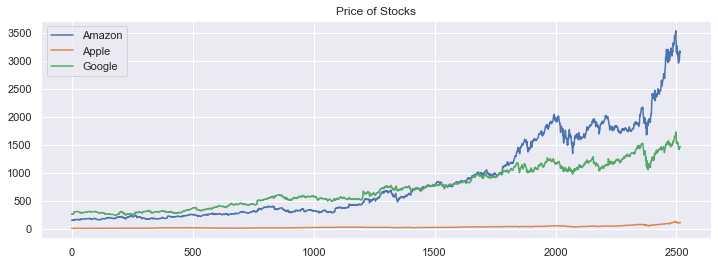

In [112]:
# Plot the actual prices of all stocks
df.plot(figsize = (12,4))
plt.title("Price of Stocks")
plt.show()

#### Observation:
The stocks of Amazon and Google show a clear upward trend while Apple & J&J appears to be stable.

In the next step, in order to test the contrinution of trend, seasonality and systemic risks towards the non-stationarity, timeseries decomposition is done.

### Additive seasonal decomposition

In [113]:
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

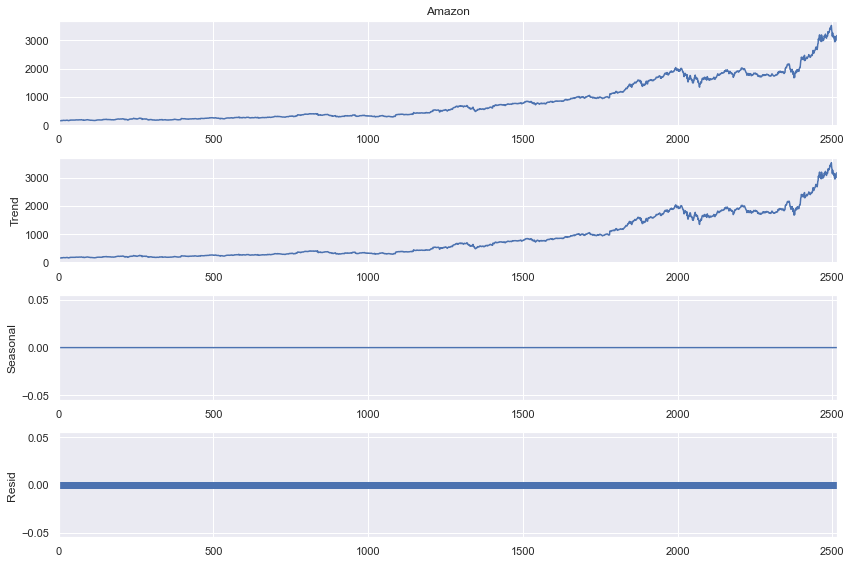

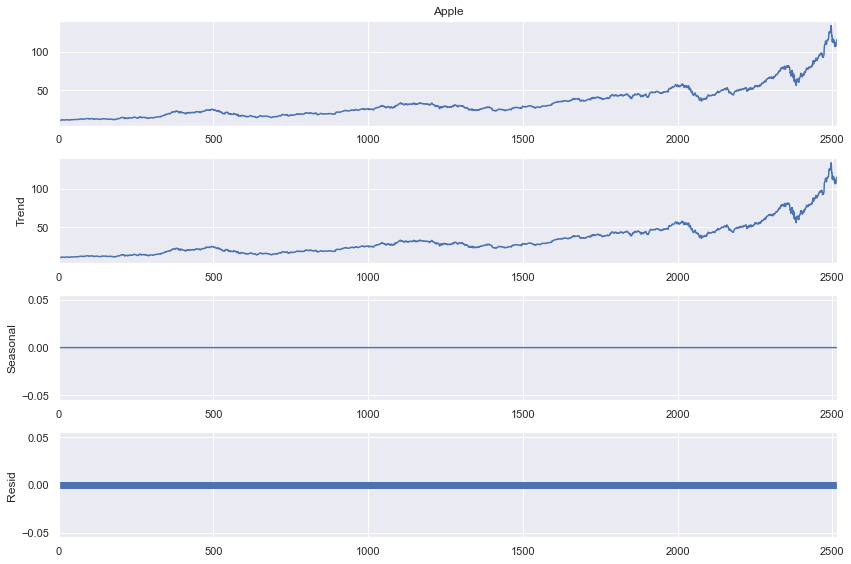

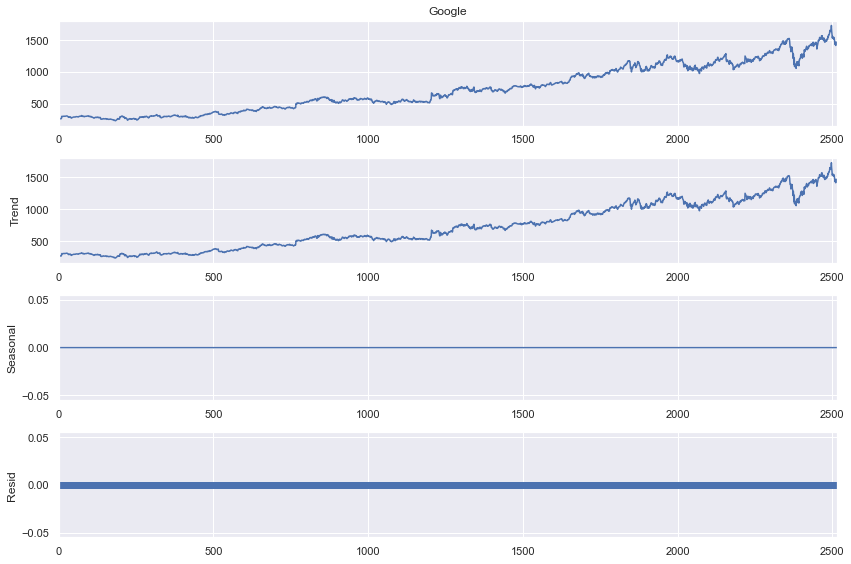

In [114]:
# Additive seasonal decomposition for all stocks
for col in df.columns:
    rcParams['figure.figsize'] = 12, 8
    add_result = seasonal_decompose(df[col], model='additive', period =1) # additive seasonal index
    fig = add_result.plot()
    plt.show()

# # Additive seasonal decomposition for Amazon
# rcParams['figure.figsize'] = 12, 8
# add_result = seasonal_decompose(df['Amazon'], model='additive', period =1) # additive seasonal index
# fig = add_result.plot()
# plt.show()

### Multiplicative seasonal decomposition

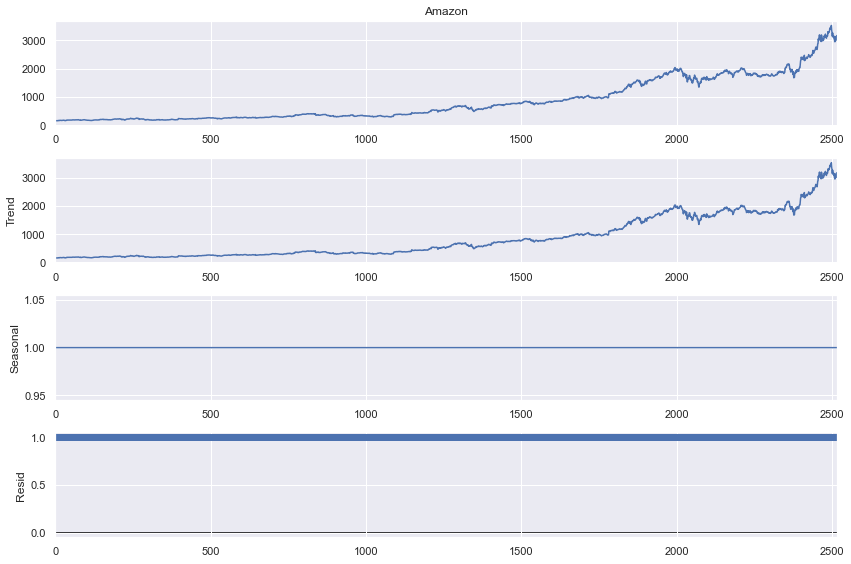

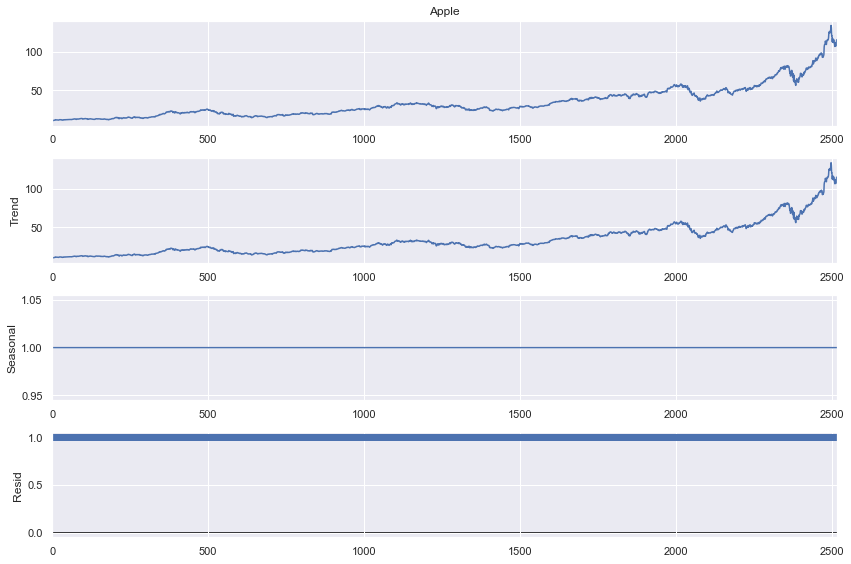

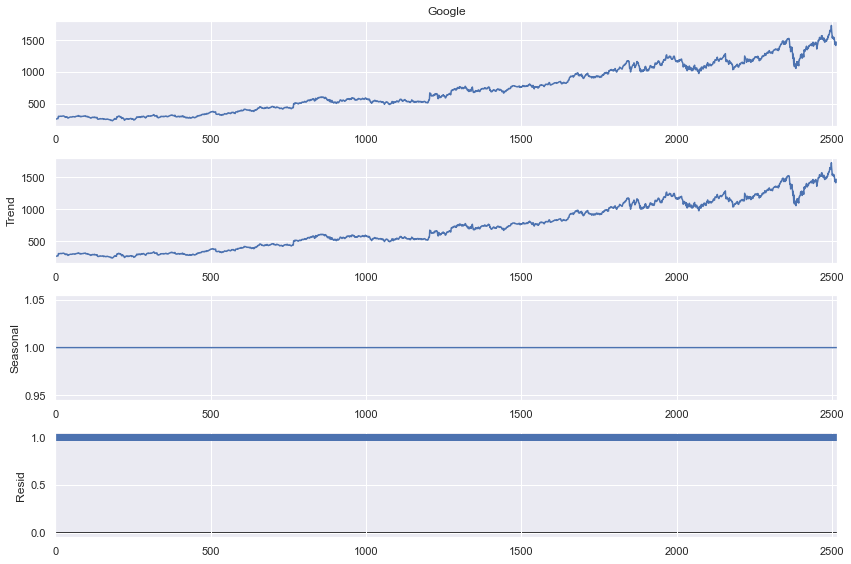

In [115]:
# Multiplicative seasonal decomposition for J&J
for col in df.columns:
    mul_result = seasonal_decompose(df[col], model='multiplicative', period=1) # multiplicative seasonal index
    fig = mul_result.plot()
    plt.show()

# # Multiplicative seasonal decomposition for J&J
# mul_result = seasonal_decompose(df['Amazon'], model='multiplicative', period=1) # multiplicative seasonal index
# fig = mul_result.plot()
# plt.show()

#### Observation:
1. The graphs show that there is a clear uptrend in the data; however, seasonality and and systemic effect of residues are nil.
2. Hence, it can be concluded that the non stationarity in the data is due to the effect of trend. 
3. Hence exponential smoothing and Auto Regression models can be explored. 
4. Also, the portfolio contains multiple stocks to be predicted and hence the **Vector Auto Regression model** can also be evaluated for its ability to forecast future prices. 
5. RMSE and MAPE values would be used for evaluating the model. The model that shows lowest RMSE and MAPE would be selected for forecasting.

### 5.4. Test-Train Split

In [116]:
# Length of the dataframe
len(df)

2517

In [117]:
# Keeping 70% values as train
train_len = int(df.shape[0]*0.7)
test_len = int(df.shape[0]) - int(df.shape[0]*0.7)

# Train data
train = df[:train_len] 

# Test data
test = df[train_len:]

### The dataset of Amazon stocks alone is taken as an example for testing the effectiveness of the models in subsequent parts

### 5.5. Build and evaluate the ML Models for Time series forecast

1. Since the smoothing methods are quiet useful for datasets with trend and seasonality, these models are evaluated.The models include: Simple exponential smoothing, Holt's exponential smoothing, Holt-winter's additive forecast method, Holt-Winter's multiplicative forcast method.
2. Since ARIMA set of models will be tested
3. Since the dataset contains prices of multiple stocks, VAR method will be built and evaluated

### 5.5.2. Holt's method with trend

In [118]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model for Amazon
hws_model = ExponentialSmoothing(np.asarray(train['Amazon']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
hws_model_fit = hws_model.fit(optimized=True)
print(hws_model_fit.params)
holt = test.copy()
holt['holt_forecast'] = hws_model_fit.forecast(len(test))

{'smoothing_level': 0.9968944520990369, 'smoothing_trend': 6.164572860979789e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 153.81515228018876, 'initial_trend': 0.43268089317057257, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


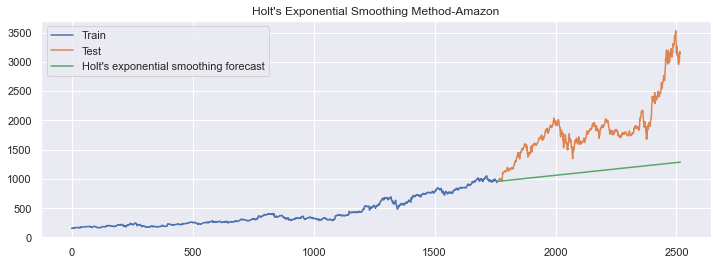

In [119]:
# Plot train, test and forecast

# Plot train, test and forecast for Amazon
plt.figure(figsize=(12,4))
plt.plot( train['Amazon'], label='Train')
plt.plot(test['Amazon'], label='Test')
plt.plot(holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method-Amazon')
plt.show()


In [120]:
# # RMSE& MAPE for Simple exponential smoothing forecast-Amazon
# rmse = np.sqrt(mean_squared_error(test['Amazon'], ses['ses_forecast'])).round(2)
# mape = np.round(np.mean(np.abs(test['Amazon']-ses['ses_forecast'])/test['J&J'])*100,2)

# results_Amazon = pd.DataFrame({'Method':['SES'], 'RMSE': [rmse],'MAPE': [mape] })
# results_Amazon

In [121]:
# Calculate RSME and MAPE

from sklearn.metrics import mean_squared_error

In [122]:
# RMSE & MAPE for Holt's exponential smoothing method - Amazon
rmse = np.sqrt(mean_squared_error(test['Amazon'], holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon']-holt['holt_forecast'])/test['Amazon'])*100,2)

results_Amazon = pd.DataFrame({'Method':['Holt\'s Exp Smoothing'], 'RMSE': [rmse],'MAPE': [mape] })
# results_Amazon = pd.concat([results_Amazon, tempResults_Amazon])
# results_Amazon = results_Amazon[['Method', 'RMSE', 'MAPE']]
results_Amazon

,Method,RMSE,MAPE
0,Holt's Exp Smoothing,857.35,36.82


## Auto Regressive methods

1. Under ARIMA set of models, Auto Regression (AR), Moving Average (MA), Auto REgressive Moving Average (ARMA), Auto REgressive Integrated Moving Average (ARIMA) and Seasonal ARIMA (SARIMA) methods are to be compared.
2. As observed, the data is non stationary. Before testing the data in ARIMA models, it has to be made stationary.
3. This is done by Box-cox transformation followed by differencinng.
4. Stationarity is verified after transformation and differencing.
5. The stationary data is fit in the model to evaluate its effectiveness.

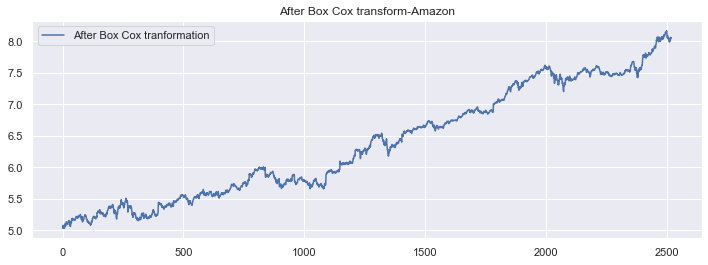

In [123]:
# Box Cox transformation to make variance constant

from scipy.stats import boxcox


df_boxcox_Amazon = pd.Series(boxcox(df['Amazon'], lmbda=0), index = df.index)

plt.figure(figsize=(12,4))
plt.plot(df_boxcox_Amazon, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform-Amazon')
plt.show()

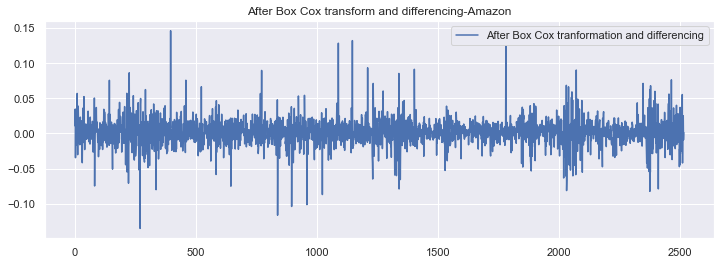

In [124]:
# Differencing to remove trend

df_boxcox_diff_Amazon = pd.Series(df_boxcox_Amazon - df_boxcox_Amazon.shift(), df.index)
plt.figure(figsize=(12,4))
plt.plot(df_boxcox_diff_Amazon, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing-Amazon')
plt.show()

#### Observation: 
After the boxcox transformation and first order differencing the trend is removed and the data is distributed around the mean. 

#### Check for stationarity after tranformation and differencing

In [125]:
# Check for null values after differencing
df_boxcox_diff_Amazon.head(3)

0         NaN
1    0.010870
2    0.034658
dtype: float64

In [126]:
df_boxcox_diff_Amazon.dropna(inplace=True)

In [127]:
# Check for null values again
df_boxcox_diff_Amazon.head(3)

1    0.010870
2    0.034658
3   -0.034594
dtype: float64

In [128]:
# Augmented Dickey-Fuller (ADF) test

adf_test = adfuller(df_boxcox_diff_Amazon)

print('Amazon')
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

Amazon
ADF Statistic: -51.444151
Critical Values @ 0.05: -2.86
p-value: 0.000000


In [129]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

kpss_test = kpss(df_boxcox_diff_Amazon)

print('Amazon')
print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

Amazon
KPSS Statistic: 0.062235
Critical Values @ 0.05: 0.46
p-value: 0.100000


In [130]:
# Test-Train Split of differentiated data
train_df_boxcox_Amazon = df_boxcox_Amazon[:train_len]
test_df_boxcox_Amazon = df_boxcox_Amazon[train_len:]
train_df_boxcox_diff_Amazon = df_boxcox_diff_Amazon[:train_len-1]
test_df_boxcox_diff_Amazon = df_boxcox_diff_Amazon[train_len-1:]

### 5.5.5. Auto Regression (AR) Method

In [131]:
# Import ARIMA library and fit the model
from statsmodels.tsa.arima.model import ARIMA
ar_model = ARIMA(train_df_boxcox_diff_Amazon, order=(1, 0, 0)) 
ar_model_fit = ar_model.fit()
print(ar_model_fit.params)

const     0.001037
ar.L1    -0.001730
sigma2    0.000378
dtype: float64


In [132]:
# Recover original time series
ar = df_boxcox_diff_Amazon.copy()
ar['ar_forecast_boxcox_diff'] = ar_model_fit.predict(df_boxcox_diff_Amazon.index.min(), df_boxcox_diff_Amazon.index.max())
ar['ar_forecast_boxcox'] = ar['ar_forecast_boxcox_diff'].cumsum()
ar['ar_forecast_boxcox'] = ar['ar_forecast_boxcox'].add(df_boxcox_Amazon[0])
ar['ar_forecast'] = np.exp(ar['ar_forecast_boxcox'])

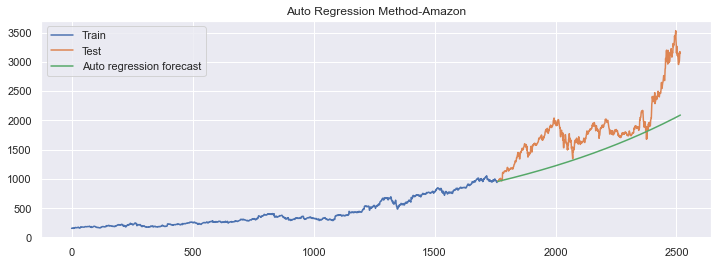

In [133]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Amazon'], label='Train')
plt.plot(test['Amazon'], label='Test')
plt.plot(ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method-Amazon')
plt.show()

In [134]:
# Calculate RMSE and MAPE for 'Autoregressive (AR) method' - Amazon
rmse = np.sqrt(mean_squared_error(test['Amazon'][1:], ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon'][1:]-ar['ar_forecast'][test.index.min():])/test['Amazon'])*100,2)

tempResults_Amazon = pd.DataFrame({'Method':['AR'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon = pd.concat([results_Amazon, tempResults_Amazon])
results_Amazon = results_Amazon[['Method', 'RMSE', 'MAPE']]
results_Amazon

,Method,RMSE,MAPE
0,Holt's Exp Smoothing,857.35,36.82
0,AR,505.13,20.85


### 5.5.6. Moving average method (MA)

In [135]:
# Create and fit model
ma_model = ARIMA(train_df_boxcox_diff_Amazon, order=(0, 0, 1)) 
ma_model_fit = ma_model.fit()
print(ma_model_fit.params)

const     0.001036
ma.L1    -0.001363
sigma2    0.000378
dtype: float64


In [136]:
# Recover original time series
ma = df_boxcox_diff_Amazon.copy()
ma['ma_forecast_boxcox_diff'] = ma_model_fit.predict(df_boxcox_diff_Amazon.index.min(), df_boxcox_diff_Amazon.index.max())
ma['ma_forecast_boxcox'] = ma['ma_forecast_boxcox_diff'].cumsum()
ma['ma_forecast_boxcox'] = ma['ma_forecast_boxcox'].add(df_boxcox_Amazon[0])
ma['ma_forecast'] = np.exp(ma['ma_forecast_boxcox'])

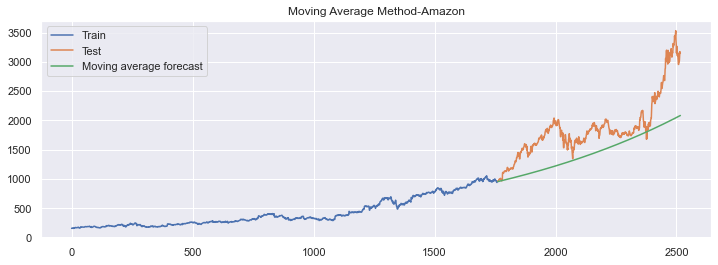

In [137]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Amazon'], label='Train')
plt.plot(test['Amazon'], label='Test')
plt.plot(ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method-Amazon')
plt.show()

In [138]:
# Calculate RMSE and MAPE for 'Moving Average (MA) method' - Amazon
rmse = np.sqrt(mean_squared_error(test['Amazon'][1:], ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon'][1:]-ma['ma_forecast'][test.index.min():])/test['Amazon'])*100,2)

tempResults_Amazon = pd.DataFrame({'Method':['MA'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon = pd.concat([results_Amazon, tempResults_Amazon])
results_Amazon = results_Amazon[['Method', 'RMSE', 'MAPE']]
results_Amazon

,Method,RMSE,MAPE
0,Holt's Exp Smoothing,857.35,36.82
0,AR,505.13,20.85
0,MA,508.88,21.07


### 5.5.7. Auto regression moving average method (ARMA)

In [139]:
# Create and fit the model
arma_model = ARIMA(train_df_boxcox_diff_Amazon, order=(1, 0, 1))
arma_model_fit = arma_model.fit()
print(arma_model_fit.params)

const     1.035891e-03
ar.L1    -3.656750e-07
ma.L1    -3.677357e-07
sigma2    3.775763e-04
dtype: float64


In [140]:
# Recover original time series

arma = df_boxcox_diff_Amazon.copy()
arma['arma_forecast_boxcox_diff'] = arma_model_fit.predict(df_boxcox_diff_Amazon.index.min(), df_boxcox_diff_Amazon.index.max())
arma['arma_forecast_boxcox'] = arma['arma_forecast_boxcox_diff'].cumsum()
arma['arma_forecast_boxcox'] = arma['arma_forecast_boxcox'].add(df_boxcox_Amazon[0])
arma['arma_forecast'] = np.exp(arma['arma_forecast_boxcox'])


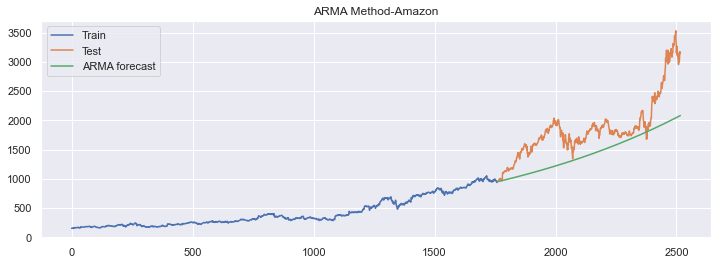

In [141]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( df['Amazon'][:train_len-1], label='Train')
plt.plot(df['Amazon'][train_len-1:], label='Test')
plt.plot(arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method-Amazon')
plt.show()

In [142]:
# Calculate RMSE and MAPE 'Autoregressive moving average (ARMA) method' - Amazon
rmse = np.sqrt(mean_squared_error(test['Amazon'], arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon']-arma['arma_forecast'][train_len-1:])/test['Amazon'])*100,2)

tempResults_Amazon = pd.DataFrame({'Method':['ARMA'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon = pd.concat([results_Amazon, tempResults_Amazon])
results_Amazon = results_Amazon[['Method', 'RMSE', 'MAPE']]
results_Amazon

,Method,RMSE,MAPE
0,Holt's Exp Smoothing,857.35,36.82
0,AR,505.13,20.85
0,MA,508.88,21.07
0,ARMA,508.85,21.06


### 5.5.8. Auto regressive integrated moving average (ARIMA)

In [143]:
# Create and fit the model
arima_model = ARIMA(train_df_boxcox_diff_Amazon, order=(1, 1, 1))
arima_model_fit = arima_model.fit()
print(arima_model_fit.params)

ar.L1    -0.001161
ma.L1    -0.999928
sigma2    0.000378
dtype: float64


In [144]:
# Recover original time series forecast
arima = df_boxcox_diff_Amazon.copy()
arima['arima_forecast_boxcox_diff'] = arima_model_fit.predict(df_boxcox_diff_Amazon.index.min(), df_boxcox_diff_Amazon.index.max())
arima['arima_forecast_boxcox'] = arima['arima_forecast_boxcox_diff'].cumsum()
arima['arima_forecast_boxcox'] = arima['arima_forecast_boxcox'].add(df_boxcox_Amazon[0])
arima['arima_forecast'] = np.exp(arima['arima_forecast_boxcox'])

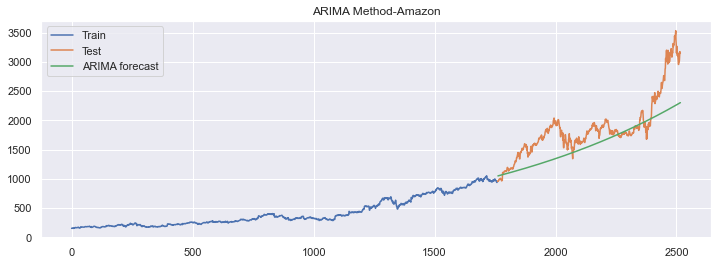

In [145]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot( df['Amazon'][:train_len-1], label='Train')
plt.plot(df['Amazon'][train_len-1:], label='Test')
plt.plot(arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('ARIMA Method-Amazon')
plt.show()

In [146]:
# Calculate RMSE and MAPE for ARIMA- Amazon
rmse = np.sqrt(mean_squared_error(test['Amazon'][1:], arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon'][1:]-arima['arima_forecast'][test.index.min():])/test['Amazon'])*100,2)

tempResults_Amazon = pd.DataFrame({'Method':['ARIMA'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon = pd.concat([results_Amazon, tempResults_Amazon])
results_Amazon = results_Amazon[['Method', 'RMSE', 'MAPE']]
results_Amazon

,Method,RMSE,MAPE
0,Holt's Exp Smoothing,857.35,36.82
0,AR,505.13,20.85
0,MA,508.88,21.07
0,ARMA,508.85,21.06
0,ARIMA,388.09,14.47


### 5.5.8. Seasonal ARIMA

In [147]:
# Import SARIMAX

from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(train_df_boxcox_diff_Amazon, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
sarima_model_fit = sarima_model.fit()
print(sarima_model_fit.params)

ar.L1       0.000769
ma.L1      -0.999274
ar.S.L12   -0.049568
ma.S.L12   -0.999684
sigma2      0.000376
dtype: float64


In [148]:
# Recover original time series forecast

sarima = df_boxcox_diff_Amazon.copy()
sarima['sarima_forecast_boxcox'] = sarima_model_fit.predict(df_boxcox_diff_Amazon.index.min(), df_boxcox_diff_Amazon.index.max())
sarima['sarima_forecast'] = np.exp(sarima['sarima_forecast_boxcox'])

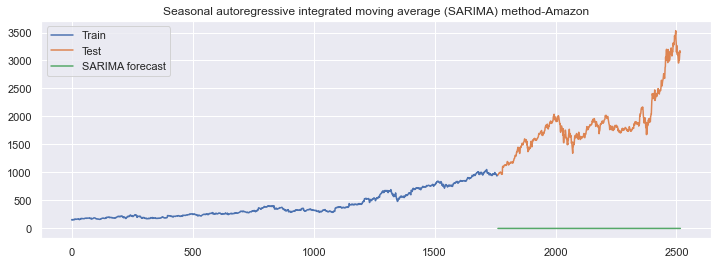

In [149]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Amazon'], label='Train')
plt.plot(test['Amazon'], label='Test')
plt.plot(sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method-Amazon')
plt.show()

In [150]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Amazon'][1:], sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Amazon'][1:]-sarima['sarima_forecast'][test.index.min():])/test['Amazon'])*100,2)

tempResults_Amazon = pd.DataFrame({'Method':['SARIMA'], 'RMSE': [rmse],'MAPE': [mape] })
results_Amazon = pd.concat([results_Amazon, tempResults_Amazon])
results_Amazon = results_Amazon[['Method', 'RMSE', 'MAPE']]
results_Amazon

,Method,RMSE,MAPE
0,Holt's Exp Smoothing,857.35,36.82
0,AR,505.13,20.85
0,MA,508.88,21.07
0,ARMA,508.85,21.06
0,ARIMA,388.09,14.47
0,SARIMA,1929.34,99.94


#### Plot all the result of all the models

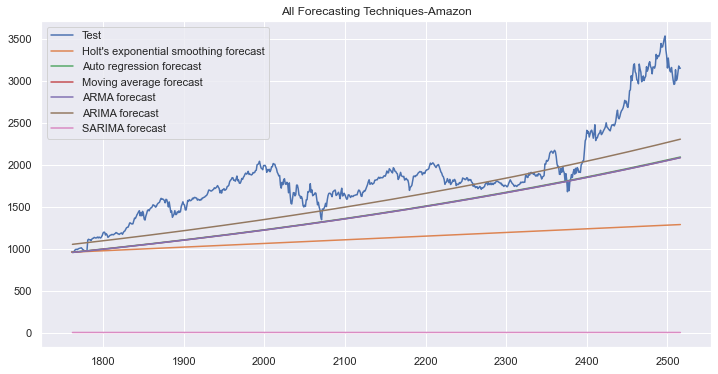

In [151]:
# Plot showing comparative forecasts of all smoothing techniques
plt.figure(figsize=(12,6))
plt.plot(test['Amazon'], label='Test')
plt.plot(holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.plot(ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.plot(ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.plot(arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.plot(arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.plot(sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')


plt.legend(loc='best')
plt.title('All Forecasting Techniques-Amazon')
plt.show()

### Observation: 

1. When comparing the RMSE and MAPE resutlts of all the ML models, SARIMA gives lowest RMSE and MAPE values and the predicted values fit perfectly on the test data set
2. However, the model completely overfits on the test data
2. Before deciding whether to select SARIMA or not, Vector Auto Regression can also be evaluated.

#### Plot the results of RMSE and MAPE

In [152]:
results_Amazon_final=results_Amazon.set_index('Method')

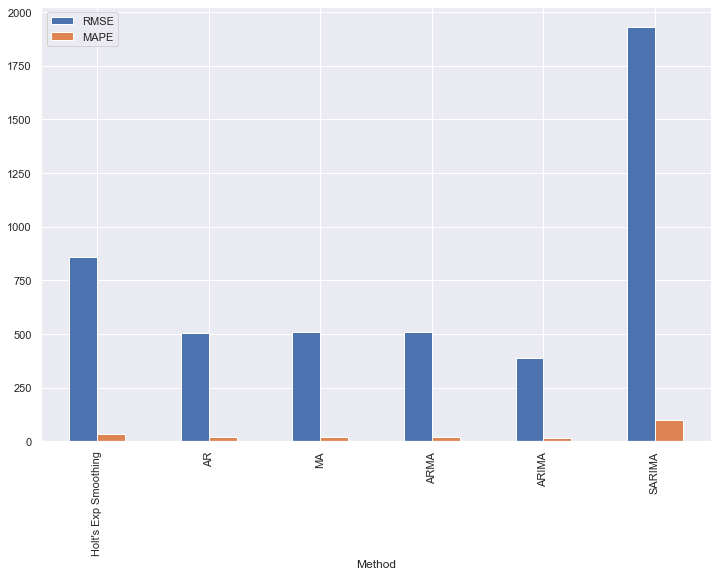

In [153]:
results_Amazon_final.plot.bar()
plt.show()

#### Conclusion:

Based on the above results, we conclude that ARIMA is the most suited ML model for forecastig the prices of the stocks. 

## 6. Final Recommendation: 

Alexandra may be advised to invest equally in a portfolio comprising of stocks of Amazon, Apple and Google. 
    